In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as de
import dedalus.dev as dev
import dedalus.extras.plot_tools as plot_tools
import atmospheres as atmos
from scipy import linalg
import tides
import modes
import parameters as param
import mpi4py.MPI as MPI
import uuid
import logging
import pickle
import pathlib
logger = logging.getLogger(__name__)
%matplotlib notebook

In [2]:
import importlib
importlib.reload(param)

<module 'parameters' from '/Users/kburns/Hg/pg_coupling/compressible/notebooks/parameters.py'>

## Solve 2D linear tide

In [3]:
param.A_tide = 1

domain, problem = tides.linear_tide_2d(param, dtype=np.complex128)
solver_bvp = problem.build_solver()
solver_bvp.solve()
solver_bvp.state.gather()
solver_bvp.state.data[0,:] = 0

domain, problem = tides.ivp(param, dtype=np.complex128)
solver = problem.build_solver(param.ts)
np.copyto(solver.state.data, solver_bvp.state.data)
solver.state.scatter()

2018-05-05 19:29:43,485 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-05 19:29:43,487 distributor 0/1 DEBUG :: Mesh: []
2018-05-05 19:29:43,495 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 19:29:43,496 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:29:43,497 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-05 19:29:43,498 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-05 19:29:43,502 problems 0/1 DEBUG ::   LHS object form: dz(pz) + ((N2*(g**-1))*pz)
2018-05-05 19:29:43,503 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-05 19:29:43,511 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-05 19:29:43,514 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*(γ**-1))*δpz))
2018-05-05 19:29:43,516 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 19:29:43,517 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:29:43,518 

2018-05-05 19:29:45,444 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:29:45,445 problems 0/1 DEBUG ::   LHS object form: wz + (-1*dz(w))
2018-05-05 19:29:45,446 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:29:45,447 problems 0/1 DEBUG ::   L linear form: wz + (-1*dz(w))
2018-05-05 19:29:45,448 problems 0/1 DEBUG :: Parsing BC 0
2018-05-05 19:29:45,449 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:29:45,450 problems 0/1 DEBUG ::   LHS string form: left(txz/μ)
2018-05-05 19:29:45,450 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:29:45,452 problems 0/1 DEBUG ::   LHS object form: interp((μ*(dx(w) + uz))*(μ**-1),'z',left)
2018-05-05 19:29:45,452 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:29:45,455 problems 0/1 DEBUG ::   L linear form: interp((μ*(μ**-1))*dx(w),'z',left) + interp((μ*(μ**-1))*uz,'z',left)
2018-05-05 19:29:45,456 problems 0/1 DEBUG :: Parsing BC 1
2018-05-05 19:29:45,456 problems 0/1 DEBUG ::   Condition: True
2018-05-05

/usr/local/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:192: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


2018-05-05 19:30:00,416 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-05 19:30:00,416 distributor 0/1 DEBUG :: Mesh: []
2018-05-05 19:30:00,419 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 19:30:00,419 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:30:00,420 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-05 19:30:00,421 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-05 19:30:00,424 problems 0/1 DEBUG ::   LHS object form: dz(pz) + ((N2*(g**-1))*pz)
2018-05-05 19:30:00,424 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-05 19:30:00,429 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-05 19:30:00,431 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*(γ**-1))*δpz))
2018-05-05 19:30:00,432 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 19:30:00,432 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:30:00,433 

2018-05-05 19:30:02,498 problems 0/1 DEBUG ::   M linear form: p1
2018-05-05 19:30:02,500 problems 0/1 DEBUG ::   L linear form: ((U*dx(p1)) + (p0z*w)) + (((γ*p0)*dx(u)) + ((γ*p0)*wz))
2018-05-05 19:30:02,500 problems 0/1 DEBUG :: Parsing Eqn 4
2018-05-05 19:30:02,501 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:30:02,502 problems 0/1 DEBUG ::   LHS string form: uz - dz(u)
2018-05-05 19:30:02,503 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:30:02,504 problems 0/1 DEBUG ::   LHS object form: uz + (-1*dz(u))
2018-05-05 19:30:02,505 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:30:02,507 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 19:30:02,508 problems 0/1 DEBUG ::   L linear form: uz + (-1*dz(u))
2018-05-05 19:30:02,509 problems 0/1 DEBUG :: Parsing Eqn 5
2018-05-05 19:30:02,510 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:30:02,511 problems 0/1 DEBUG ::   LHS string form: wz - dz(w)
2018-05-05 19:30:02,511 problems 0/1 DEBUG ::   RHS stri

In [4]:
# Build systems
X0 = dev.system.FieldSystem(problem.variables, domain)
X1 = dev.system.FieldSystem(problem.variables, domain)
F = dev.system.FieldSystem(problem.variables, domain)
dF = dev.system.FieldSystem(problem.variables, domain)

# Unpack variables
a1, p1, u, w, uz, wz = X0.fields
# Gather operators
dx = domain.bases[0].Differentiate
dz = domain.bases[1].Differentiate
γ = param.γ
μ = param.μ
# Build substitutions
ux = dx(u)
wx = dx(w)
div_u = ux + wz
txx = μ*(2*ux - 2/3*div_u)
txz = μ*(wx + uz)
tzz = μ*(2*wz - 2/3*div_u)
# Build expressions
F1 = - (u*ux + w*uz) - a1*dx(p1) + a1*(dx(txx) + dz(txz))
F2 = - (u*wx + w*wz) - a1*dz(p1) + a1*(dx(txz) + dz(tzz))
F3 = - (u*dx(a1) + w*dz(a1)) +   a1*div_u
F4 = - (u*dx(p1) + w*dz(p1)) - γ*p1*div_u

# Build Frechet differentials
def frechet(F, X0, X1):
    dF = 0
    ep = dev.field.Scalar(name='__epsilon__')
    for x0, x1 in zip(X0.fields, X1.fields):
        dFi = F.replace(x0, x0 + ep*x1)
        dFi = dev.field.Operand.cast(dFi.sym_diff(ep))
        dFi = dFi.replace(ep, 0)
        dF += dFi
    return dF
dF1 = frechet(F1, X0, X1)
dF2 = frechet(F2, X0, X1)
dF3 = frechet(F3, X0, X1)
dF4 = frechet(F4, X0, X1)
# Build handlers
evaluator = dev.evaluator.Evaluator(domain, problem.namespace)
dFe_handler = evaluator.add_system_handler(iter=1, group='dF')
dFb_handler = evaluator.add_system_handler(iter=1, group='dF')
dFe_handler.add_task(dF1)
dFe_handler.add_task(dF2)
dFe_handler.add_task(dF3)
dFe_handler.add_task(dF4)
for i in range(2):
    dFe_handler.add_task(0*a1)
for i in range(4):
    dFb_handler.add_task(0*a1)
dFe = dFe_handler.build_system()
dFb = dFb_handler.build_system()

def compute_dF(iX0, iX1):
    # Copy to prebuilt systems
    iX0.gather()
    iX1.gather()
    np.copyto(X0.data, iX0.data)
    np.copyto(X1.data, iX1.data)
    X0.scatter()
    X1.scatter()
    # Evaluate and precondition dF
    evaluator.evaluate_group('dF')
    for p in solver.pencils:
        pFe = dFe.get_pencil(p)
        pFb = dFb.get_pencil(p)
        if p.G_bc is None:
            dF.set_pencil(p, p.G_eq*pFe)
        else:
            dF.set_pencil(p, p.G_eq*pFe + p.G_bc*pFb)
    dF.scatter()

In [5]:
force = True
savefile = "coupling_emodes_%i.pkl" %param.Nz

if (not force) and pathlib.Path(savefile).exists():
    # Load modes
    print('Loading modes')
    shortmodes = pickle.load(open(savefile, "rb"))
else:
    # Build modes
    print('Building modes')
    krel_list = np.arange(-5, 5+0.005, 0.5)
    eigenmodes = {}
    for krel in krel_list:
        eigenmodes[krel] = modes.compute_eigenmodes(param, krel*param.k_tide, sparse=False)
    # Save modes
    shortmodes = {key: val[:5] for key, val in eigenmodes.items()}
    pickle.dump(shortmodes, open(savefile, "wb"))

Building modes
2018-05-05 19:30:24,635 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-05 19:30:24,636 distributor 0/1 DEBUG :: Mesh: []
2018-05-05 19:30:24,639 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 19:30:24,640 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:30:24,641 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-05 19:30:24,641 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-05 19:30:24,643 problems 0/1 DEBUG ::   LHS object form: dz(pz) + ((N2*(g**-1))*pz)
2018-05-05 19:30:24,644 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-05 19:30:24,649 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-05 19:30:24,651 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*(γ**-1))*δpz))
2018-05-05 19:30:24,653 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 19:30:24,653 problems 0/1 DEBUG ::   Condition: True
2018-05-0

2018-05-05 19:30:26,676 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*p1) + (p0z*w)) + ((((γ*p0)*(1j*kx))*u) + ((γ*p0)*wz))
2018-05-05 19:30:26,677 problems 0/1 DEBUG :: Parsing Eqn 4
2018-05-05 19:30:26,678 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:30:26,679 problems 0/1 DEBUG ::   LHS string form: uz - dz(u)
2018-05-05 19:30:26,680 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:30:26,681 problems 0/1 DEBUG ::   LHS object form: uz + (-1*dz(u))
2018-05-05 19:30:26,683 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:30:26,685 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 19:30:26,686 problems 0/1 DEBUG ::   L linear form: uz + (-1*dz(u))
2018-05-05 19:30:26,687 problems 0/1 DEBUG :: Parsing Eqn 5
2018-05-05 19:30:26,687 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:30:26,688 problems 0/1 DEBUG ::   LHS string form: wz - dz(w)
2018-05-05 19:30:26,689 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:30:26,690 problems 0/1 DEBUG 

/Users/kburns/Hg/pg_coupling/compressible/notebooks/modes.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[i] = E_op.evaluate()['c'][0]


2018-05-05 19:34:47,596 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-05 19:34:47,597 distributor 0/1 DEBUG :: Mesh: []
2018-05-05 19:34:47,600 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 19:34:47,601 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:34:47,602 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-05 19:34:47,603 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-05 19:34:47,606 problems 0/1 DEBUG ::   LHS object form: dz(pz) + ((N2*(g**-1))*pz)
2018-05-05 19:34:47,607 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-05 19:34:47,611 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-05 19:34:47,613 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*(γ**-1))*δpz))
2018-05-05 19:34:47,615 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 19:34:47,615 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:34:47,616 

2018-05-05 19:34:49,800 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*p1) + (p0z*w)) + ((((γ*p0)*(1j*kx))*u) + ((γ*p0)*wz))
2018-05-05 19:34:49,800 problems 0/1 DEBUG :: Parsing Eqn 4
2018-05-05 19:34:49,801 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:34:49,802 problems 0/1 DEBUG ::   LHS string form: uz - dz(u)
2018-05-05 19:34:49,803 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:34:49,804 problems 0/1 DEBUG ::   LHS object form: uz + (-1*dz(u))
2018-05-05 19:34:49,805 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:34:49,807 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 19:34:49,808 problems 0/1 DEBUG ::   L linear form: uz + (-1*dz(u))
2018-05-05 19:34:49,809 problems 0/1 DEBUG :: Parsing Eqn 5
2018-05-05 19:34:49,810 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:34:49,811 problems 0/1 DEBUG ::   LHS string form: wz - dz(w)
2018-05-05 19:34:49,812 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:34:49,813 problems 0/1 DEBUG 

2018-05-05 19:39:17,060 solvers 0/1 DEBUG :: Beginning NLBVP instantiation
2018-05-05 19:39:17,135 basis 0/1 DEBUG :: Building FFTW DCT plan for (dtype, gshape, axis) = (complex128, (256,), 0)
2018-05-05 19:39:17,225 field 0/1 DEBUG :: Expanded NCC 'N2*(g**-1)' to mode 38 with 20 terms.
2018-05-05 19:39:17,253 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 4.0e+01/s
2018-05-05 19:39:17,255 solvers 0/1 DEBUG :: Finished NLBVP instantiation
2018-05-05 19:39:17,263 basis 0/1 DEBUG :: Building FFTW DCT plan for (dtype, gshape, axis) = (complex128, (512,), 0)
2018-05-05 19:39:17,548 field 0/1 DEBUG :: Expanded NCC '((pz*pz)*(-1*(p**-2)))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 19:39:17,843 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 19:39:18,123 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 19:39:18,153 pencil 0/1 INFO :: Building pencil matrix 1/1 (~1

2018-05-05 19:39:18,925 problems 0/1 DEBUG :: Parsing BC 2
2018-05-05 19:39:18,926 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:39:18,926 problems 0/1 DEBUG ::   LHS string form: left(w)
2018-05-05 19:39:18,927 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:39:18,928 problems 0/1 DEBUG ::   LHS object form: interp(w,'z',left)
2018-05-05 19:39:18,929 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:39:18,931 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 19:39:18,931 problems 0/1 DEBUG ::   L linear form: interp(w,'z',left)
2018-05-05 19:39:18,932 problems 0/1 DEBUG :: Parsing BC 3
2018-05-05 19:39:18,933 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:39:18,934 problems 0/1 DEBUG ::   LHS string form: right(w)
2018-05-05 19:39:18,934 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:39:18,935 problems 0/1 DEBUG ::   LHS object form: interp(w,'z',right)
2018-05-05 19:39:18,936 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:39:18,937

2018-05-05 19:43:40,097 problems 0/1 DEBUG ::   M linear form: u
2018-05-05 19:43:40,112 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*u) + ((a0*(1j*kx))*p1)) + ((((-1*(a0*((1j*kx)*(μ*(2*(1j*kx))))))*u) + (((-1*(a0*((1j*kx)*(μ*(-1*(0.6666666666666666*(1j*kx)))))))*u) + ((-1*(a0*((1j*kx)*(μ*-0.6666666666666666))))*wz))) + (((-1*(a0*μ))*dz((1j*kx)*w)) + ((-1*(a0*μ))*dz(uz))))
2018-05-05 19:43:40,113 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 19:43:40,114 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:43:40,115 problems 0/1 DEBUG ::   LHS string form: dt(w) + U*wx + a0*dz(p1) + a1*p0z - a0*(dx(txz) + dz(tzz))
2018-05-05 19:43:40,116 problems 0/1 DEBUG ::   RHS string form: - (u*wx + w*wz) - a1*dz(p1) + a1*(dx(txz) + dz(tzz))
2018-05-05 19:43:40,119 problems 0/1 DEBUG ::   LHS object form: ((((σ*w) + (U*((1j*kx)*w))) + (a0*dz(p1))) + (a1*p0z)) + (-1*(a0*(((1j*kx)*(μ*(((1j*kx)*w) + uz))) + dz(μ*((2*wz) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz))))))))
2018-05-05 19:43:40

2018-05-05 19:43:41,468 field 0/1 DEBUG :: Expanded NCC 'a0z' to mode 33 with 33 terms.
2018-05-05 19:43:41,637 field 0/1 DEBUG :: Expanded NCC '-1*(a0*(1j*kx))' to mode 32 with 32 terms.
2018-05-05 19:43:41,799 field 0/1 DEBUG :: Expanded NCC '-1*a0' to mode 28 with 29 terms.
2018-05-05 19:43:41,970 field 0/1 DEBUG :: Expanded NCC '(γ*p0)*(1j*kx)' to mode 27 with 28 terms.
2018-05-05 19:43:42,106 field 0/1 DEBUG :: Expanded NCC 'γ*p0' to mode 23 with 24 terms.
2018-05-05 19:47:55,741 modes 0/1 INFO :: Max eval mismatch: 0.000000e+00
2018-05-05 19:47:57,825 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-05 19:47:57,826 distributor 0/1 DEBUG :: Mesh: []
2018-05-05 19:47:57,829 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 19:47:57,830 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:47:57,831 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-05 19:47:57,832 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-05 19:47:57,834 problems 0/1 DEBUG ::   L

2018-05-05 19:47:59,959 problems 0/1 DEBUG ::   LHS string form: dt(p1) + U*dx(p1) + u*p0x + w*p0z + γ*p0*div_u
2018-05-05 19:47:59,960 problems 0/1 DEBUG ::   RHS string form: - (U*p0x + u*dx(p1) + w*dz(p1)) - γ*p1*div_u
2018-05-05 19:47:59,961 problems 0/1 DEBUG ::   LHS object form: (((σ*p1) + (U*((1j*kx)*p1))) + (w*p0z)) + ((γ*p0)*(((1j*kx)*u) + wz))
2018-05-05 19:47:59,962 problems 0/1 DEBUG ::   RHS object form: (-1*((u*((1j*kx)*p1)) + (w*dz(p1)))) + (-1*((γ*p1)*(((1j*kx)*u) + wz)))
2018-05-05 19:47:59,972 problems 0/1 DEBUG ::   M linear form: p1
2018-05-05 19:47:59,974 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*p1) + (p0z*w)) + ((((γ*p0)*(1j*kx))*u) + ((γ*p0)*wz))
2018-05-05 19:47:59,975 problems 0/1 DEBUG :: Parsing Eqn 4
2018-05-05 19:47:59,975 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:47:59,976 problems 0/1 DEBUG ::   LHS string form: uz - dz(u)
2018-05-05 19:47:59,977 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:47:59,978 problems 0/1 DEBUG

2018-05-05 19:52:21,401 problems 0/1 DEBUG :: Parsing BC 1
2018-05-05 19:52:21,401 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:52:21,402 problems 0/1 DEBUG ::   LHS string form: left(pz)
2018-05-05 19:52:21,403 problems 0/1 DEBUG ::   RHS string form: pz0
2018-05-05 19:52:21,404 problems 0/1 DEBUG ::   LHS object form: interp(pz,'z',left)
2018-05-05 19:52:21,405 problems 0/1 DEBUG ::   RHS object form: pz0
2018-05-05 19:52:21,406 problems 0/1 DEBUG ::   L linear form: interp(δpz,'z',left)
2018-05-05 19:52:21,407 problems 0/1 DEBUG ::   dF linear form: 0
2018-05-05 19:52:21,409 solvers 0/1 DEBUG :: Beginning NLBVP instantiation
2018-05-05 19:52:21,498 basis 0/1 DEBUG :: Building FFTW DCT plan for (dtype, gshape, axis) = (complex128, (256,), 0)
2018-05-05 19:52:21,603 field 0/1 DEBUG :: Expanded NCC 'N2*(g**-1)' to mode 38 with 20 terms.
2018-05-05 19:52:21,631 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 4.2e+01/s
2018-05-05 19:52:21,

2018-05-05 19:52:23,465 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:52:23,466 problems 0/1 DEBUG ::   LHS string form: right(txz/μ)
2018-05-05 19:52:23,466 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:52:23,468 problems 0/1 DEBUG ::   LHS object form: interp((μ*(((1j*kx)*w) + uz))*(μ**-1),'z',right)
2018-05-05 19:52:23,469 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 19:52:23,471 problems 0/1 DEBUG ::   M linear form: 0j
2018-05-05 19:52:23,473 problems 0/1 DEBUG ::   L linear form: interp(((μ*(1j*kx))*(μ**-1))*w,'z',right) + interp((μ*(μ**-1))*uz,'z',right)
2018-05-05 19:52:23,474 problems 0/1 DEBUG :: Parsing BC 2
2018-05-05 19:52:23,475 problems 0/1 DEBUG ::   Condition: True
2018-05-05 19:52:23,476 problems 0/1 DEBUG ::   LHS string form: left(w)
2018-05-05 19:52:23,477 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 19:52:23,478 problems 0/1 DEBUG ::   LHS object form: interp(w,'z',left)
2018-05-05 19:52:23,479 problems 0/1 DEBUG ::   RHS objec

2018-05-05 19:56:46,414 problems 0/1 DEBUG ::   RHS string form: - (u*ux + w*uz) - a1*dx(p1) + a1*(dx(txx) + dz(txz))
2018-05-05 19:56:46,418 problems 0/1 DEBUG ::   LHS object form: (((σ*u) + (U*((1j*kx)*u))) + (a0*((1j*kx)*p1))) + (-1*(a0*(((1j*kx)*(μ*((2*((1j*kx)*u)) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz)))))) + dz(μ*(((1j*kx)*w) + uz)))))
2018-05-05 19:56:46,419 problems 0/1 DEBUG ::   RHS object form: ((-1*((u*((1j*kx)*u)) + (w*uz))) + (-1*(a1*((1j*kx)*p1)))) + (a1*(((1j*kx)*(μ*((2*((1j*kx)*u)) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz)))))) + dz(μ*(((1j*kx)*w) + uz))))
2018-05-05 19:56:46,441 problems 0/1 DEBUG ::   M linear form: u
2018-05-05 19:56:46,453 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*u) + ((a0*(1j*kx))*p1)) + ((((-1*(a0*((1j*kx)*(μ*(2*(1j*kx))))))*u) + (((-1*(a0*((1j*kx)*(μ*(-1*(0.6666666666666666*(1j*kx)))))))*u) + ((-1*(a0*((1j*kx)*(μ*-0.6666666666666666))))*wz))) + (((-1*(a0*μ))*dz((1j*kx)*w)) + ((-1*(a0*μ))*dz(uz))))
2018-05-05 19:56:46,454 pr

2018-05-05 19:56:47,227 field 0/1 DEBUG :: Expanded NCC 'p0z' to mode 26 with 27 terms.
2018-05-05 19:56:47,275 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*(1j*kx))))' to mode 9 with 10 terms.
2018-05-05 19:56:47,316 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*μ))' to mode 7 with 8 terms.
2018-05-05 19:56:47,347 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 19:56:47,377 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 19:56:47,411 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 19:56:47,578 field 0/1 DEBUG :: Expanded NCC 'a0z' to mode 33 with 33 terms.
2018-05-05 19:56:47,726 field 0/1 DEBUG :: Expanded NCC '-1*(a0*(1j*kx))' to mode 32 with 32 terms.
2018-05-05 19:56:47,861 field 0/1 DEBUG :: Expanded NCC '-1*a0' to mode 28 with 29 terms.
2018-05-05 19:56:47,995 field 0/1 DEBUG :: Expanded NCC '(γ*p0)*(1j*kx)' to mode 25 with 26 terms.
2018-05-05 19:56:48,105 field 0/1 DEBUG :: E

2018-05-05 20:11:15,175 problems 0/1 DEBUG ::   LHS object form: (((σ*a1) + (U*((1j*kx)*a1))) + (w*a0z)) + (-1*(a0*(((1j*kx)*u) + wz)))
2018-05-05 20:11:15,176 problems 0/1 DEBUG ::   RHS object form: (-1*((u*((1j*kx)*a1)) + (w*dz(a1)))) + (a1*(((1j*kx)*u) + wz))
2018-05-05 20:11:15,185 problems 0/1 DEBUG ::   M linear form: a1
2018-05-05 20:11:15,187 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*a1) + (a0z*w)) + (((-1*(a0*(1j*kx)))*u) + ((-1*a0)*wz))
2018-05-05 20:11:15,188 problems 0/1 DEBUG :: Parsing Eqn 3
2018-05-05 20:11:15,188 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:11:15,189 problems 0/1 DEBUG ::   LHS string form: dt(p1) + U*dx(p1) + u*p0x + w*p0z + γ*p0*div_u
2018-05-05 20:11:15,190 problems 0/1 DEBUG ::   RHS string form: - (U*p0x + u*dx(p1) + w*dz(p1)) - γ*p1*div_u
2018-05-05 20:11:15,193 problems 0/1 DEBUG ::   LHS object form: (((σ*p1) + (U*((1j*kx)*p1))) + (w*p0z)) + ((γ*p0)*(((1j*kx)*u) + wz))
2018-05-05 20:11:15,194 problems 0/1 DEBUG ::   RHS obje

2018-05-05 20:15:36,678 problems 0/1 DEBUG :: Parsing BC 0
2018-05-05 20:15:36,679 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:15:36,680 problems 0/1 DEBUG ::   LHS string form: left(p)
2018-05-05 20:15:36,681 problems 0/1 DEBUG ::   RHS string form: p0
2018-05-05 20:15:36,682 problems 0/1 DEBUG ::   LHS object form: interp(p,'z',left)
2018-05-05 20:15:36,682 problems 0/1 DEBUG ::   RHS object form: p0
2018-05-05 20:15:36,684 problems 0/1 DEBUG ::   L linear form: interp(δp,'z',left)
2018-05-05 20:15:36,684 problems 0/1 DEBUG ::   dF linear form: 0
2018-05-05 20:15:36,685 problems 0/1 DEBUG :: Parsing BC 1
2018-05-05 20:15:36,686 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:15:36,687 problems 0/1 DEBUG ::   LHS string form: left(pz)
2018-05-05 20:15:36,687 problems 0/1 DEBUG ::   RHS string form: pz0
2018-05-05 20:15:36,688 problems 0/1 DEBUG ::   LHS object form: interp(pz,'z',left)
2018-05-05 20:15:36,689 problems 0/1 DEBUG ::   RHS object form: pz0
2018-05-05 20:1

2018-05-05 20:15:38,809 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:15:38,811 problems 0/1 DEBUG ::   LHS object form: interp((μ*(((1j*kx)*w) + uz))*(μ**-1),'z',left)
2018-05-05 20:15:38,812 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:15:38,815 problems 0/1 DEBUG ::   M linear form: 0j
2018-05-05 20:15:38,818 problems 0/1 DEBUG ::   L linear form: interp(((μ*(1j*kx))*(μ**-1))*w,'z',left) + interp((μ*(μ**-1))*uz,'z',left)
2018-05-05 20:15:38,819 problems 0/1 DEBUG :: Parsing BC 1
2018-05-05 20:15:38,819 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:15:38,820 problems 0/1 DEBUG ::   LHS string form: right(txz/μ)
2018-05-05 20:15:38,821 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:15:38,822 problems 0/1 DEBUG ::   LHS object form: interp((μ*(((1j*kx)*w) + uz))*(μ**-1),'z',right)
2018-05-05 20:15:38,823 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:15:38,825 problems 0/1 DEBUG ::   M linear form: 0j
2018-05-05 20:15:38,828 problems 0

2018-05-05 20:19:55,863 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.9e+01/s
2018-05-05 20:19:55,870 atmospheres 0/1 INFO :: Perturbation norm: 2.1485486148350894e-14
2018-05-05 20:19:55,875 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2018-05-05 20:19:55,877 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 20:19:55,878 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:19:55,878 problems 0/1 DEBUG ::   LHS string form: dt(u) + U*ux + a0*dx(p1) + a1*p0x - a0*(dx(txx) + dz(txz))
2018-05-05 20:19:55,879 problems 0/1 DEBUG ::   RHS string form: - (u*ux + w*uz) - a1*dx(p1) + a1*(dx(txx) + dz(txz))
2018-05-05 20:19:55,883 problems 0/1 DEBUG ::   LHS object form: (((σ*u) + (U*((1j*kx)*u))) + (a0*((1j*kx)*p1))) + (-1*(a0*(((1j*kx)*(μ*((2*((1j*kx)*u)) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz)))))) + dz(μ*(((1j*kx)*w) + uz)))))
2018-05-05 20:19:55,884 problems 0/1 DEBUG ::   RHS object form: ((-1*((u*((1j*kx)*u)) + (w*

2018-05-05 20:19:56,255 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*(-1*(0.6666666666666666*(1j*kx))))))' to mode 5 with 6 terms.
2018-05-05 20:19:56,285 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*-0.6666666666666666)))' to mode 5 with 6 terms.
2018-05-05 20:19:56,314 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 20:19:56,345 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 20:19:56,496 field 0/1 DEBUG :: Expanded NCC 'a0' to mode 28 with 29 terms.
2018-05-05 20:19:56,625 field 0/1 DEBUG :: Expanded NCC 'p0z' to mode 26 with 27 terms.
2018-05-05 20:19:56,664 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*(1j*kx))))' to mode 6 with 7 terms.
2018-05-05 20:19:56,693 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*μ))' to mode 5 with 6 terms.
2018-05-05 20:19:56,723 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 20:19:56,757 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mo

2018-05-05 20:24:14,324 problems 0/1 DEBUG :: Parsing Eqn 2
2018-05-05 20:24:14,325 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:24:14,326 problems 0/1 DEBUG ::   LHS string form: dt(a1) + U*dx(a1) + u*a0x + w*a0z -   a0*div_u
2018-05-05 20:24:14,326 problems 0/1 DEBUG ::   RHS string form: - (U*a0x + u*dx(a1) + w*dz(a1)) +   a1*div_u
2018-05-05 20:24:14,328 problems 0/1 DEBUG ::   LHS object form: (((σ*a1) + (U*((1j*kx)*a1))) + (w*a0z)) + (-1*(a0*(((1j*kx)*u) + wz)))
2018-05-05 20:24:14,329 problems 0/1 DEBUG ::   RHS object form: (-1*((u*((1j*kx)*a1)) + (w*dz(a1)))) + (a1*(((1j*kx)*u) + wz))
2018-05-05 20:24:14,338 problems 0/1 DEBUG ::   M linear form: a1
2018-05-05 20:24:14,340 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*a1) + (a0z*w)) + (((-1*(a0*(1j*kx)))*u) + ((-1*a0)*wz))
2018-05-05 20:24:14,341 problems 0/1 DEBUG :: Parsing Eqn 3
2018-05-05 20:24:14,341 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:24:14,342 problems 0/1 DEBUG ::   LHS string form: dt

2018-05-05 20:28:12,511 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:28:12,512 problems 0/1 DEBUG ::   LHS object form: dz(p) + (-1*pz)
2018-05-05 20:28:12,513 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:28:12,514 problems 0/1 DEBUG ::   L linear form: dz(δp) + (-1*δpz)
2018-05-05 20:28:12,515 problems 0/1 DEBUG ::   dF linear form: 0
2018-05-05 20:28:12,516 problems 0/1 DEBUG :: Parsing BC 0
2018-05-05 20:28:12,517 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:28:12,518 problems 0/1 DEBUG ::   LHS string form: left(p)
2018-05-05 20:28:12,518 problems 0/1 DEBUG ::   RHS string form: p0
2018-05-05 20:28:12,519 problems 0/1 DEBUG ::   LHS object form: interp(p,'z',left)
2018-05-05 20:28:12,520 problems 0/1 DEBUG ::   RHS object form: p0
2018-05-05 20:28:12,521 problems 0/1 DEBUG ::   L linear form: interp(δp,'z',left)
2018-05-05 20:28:12,522 problems 0/1 DEBUG ::   dF linear form: 0
2018-05-05 20:28:12,523 problems 0/1 DEBUG :: Parsing BC 1
2018-05-05 20:

2018-05-05 20:28:14,329 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:28:14,330 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 20:28:14,331 problems 0/1 DEBUG ::   L linear form: wz + (-1*dz(w))
2018-05-05 20:28:14,332 problems 0/1 DEBUG :: Parsing BC 0
2018-05-05 20:28:14,333 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:28:14,334 problems 0/1 DEBUG ::   LHS string form: left(txz/μ)
2018-05-05 20:28:14,335 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:28:14,336 problems 0/1 DEBUG ::   LHS object form: interp((μ*(((1j*kx)*w) + uz))*(μ**-1),'z',left)
2018-05-05 20:28:14,337 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:28:14,339 problems 0/1 DEBUG ::   M linear form: 0j
2018-05-05 20:28:14,341 problems 0/1 DEBUG ::   L linear form: interp(((μ*(1j*kx))*(μ**-1))*w,'z',left) + interp((μ*(μ**-1))*uz,'z',left)
2018-05-05 20:28:14,342 problems 0/1 DEBUG :: Parsing BC 1
2018-05-05 20:28:14,343 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:2

2018-05-05 20:32:35,329 atmospheres 0/1 INFO :: Perturbation norm: 2.7412013548920524e-07
2018-05-05 20:32:35,524 field 0/1 DEBUG :: Expanded NCC '((pz*pz)*(-1*(p**-2)))*(γ**-1)' to mode 40 with 41 terms.
2018-05-05 20:32:35,702 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 38 with 39 terms.
2018-05-05 20:32:35,882 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 38 with 39 terms.
2018-05-05 20:32:35,902 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.6e+01/s
2018-05-05 20:32:35,909 atmospheres 0/1 INFO :: Perturbation norm: 2.1485486148350894e-14
2018-05-05 20:32:35,914 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2018-05-05 20:32:35,915 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 20:32:35,916 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:32:35,916 problems 0/1 DEBUG ::   LHS string form: dt(u) + U*ux + a0*dx(p1) + a1*p0x - a0*(dx(txx) + dz(txz))
2018-05-05 20:32:35,917 prob

2018-05-05 20:32:36,083 problems 0/1 DEBUG ::   L linear form: interp(w,'z',right)
2018-05-05 20:32:36,084 solvers 0/1 DEBUG :: Beginning EVP instantiation
2018-05-05 20:32:36,085 solvers 0/1 DEBUG :: Finished EVP instantiation
2018-05-05 20:32:36,227 field 0/1 DEBUG :: Expanded NCC 'a0*(1j*kx)' to mode 30 with 30 terms.
2018-05-05 20:32:36,271 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*(2*(1j*kx)))))' to mode 8 with 9 terms.
2018-05-05 20:32:36,313 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*(-1*(0.6666666666666666*(1j*kx))))))' to mode 7 with 8 terms.
2018-05-05 20:32:36,347 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*-0.6666666666666666)))' to mode 6 with 7 terms.
2018-05-05 20:32:36,377 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 20:32:36,408 field 0/1 DEBUG :: Expanded NCC '-1*(a0*μ)' to mode 5 with 6 terms.
2018-05-05 20:32:36,550 field 0/1 DEBUG :: Expanded NCC 'a0' to mode 28 with 29 terms.
2018-05-05 20:32:36,675 fiel

2018-05-05 20:36:59,387 problems 0/1 DEBUG ::   RHS object form: ((-1*((u*((1j*kx)*w)) + (w*wz))) + (-1*(a1*dz(p1)))) + (a1*(((1j*kx)*(μ*(((1j*kx)*w) + uz))) + dz(μ*((2*wz) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz)))))))
2018-05-05 20:36:59,409 problems 0/1 DEBUG ::   M linear form: w
2018-05-05 20:36:59,425 problems 0/1 DEBUG ::   L linear form: ((((U*(1j*kx))*w) + (a0*dz(p1))) + (p0z*a1)) + ((((-1*(a0*((1j*kx)*(μ*(1j*kx)))))*w) + ((-1*(a0*((1j*kx)*μ)))*uz)) + (((-1*(a0*μ))*dz(2*wz)) + (((-1*(a0*μ))*dz((-1*(0.6666666666666666*(1j*kx)))*u)) + ((-1*(a0*μ))*dz(-0.6666666666666666*wz)))))
2018-05-05 20:36:59,426 problems 0/1 DEBUG :: Parsing Eqn 2
2018-05-05 20:36:59,426 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:36:59,427 problems 0/1 DEBUG ::   LHS string form: dt(a1) + U*dx(a1) + u*a0x + w*a0z -   a0*div_u
2018-05-05 20:36:59,428 problems 0/1 DEBUG ::   RHS string form: - (U*a0x + u*dx(a1) + w*dz(a1)) +   a1*div_u
2018-05-05 20:36:59,429 problems 0/1 DEBUG ::   LHS object

2018-05-05 20:41:20,833 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-05 20:41:20,838 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-05 20:41:20,840 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*(γ**-1))*δpz))
2018-05-05 20:41:20,841 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 20:41:20,842 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:41:20,843 problems 0/1 DEBUG ::   LHS string form: dz(p) - pz
2018-05-05 20:41:20,843 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:41:20,844 problems 0/1 DEBUG ::   LHS object form: dz(p) + (-1*pz)
2018-05-05 20:41:20,845 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:41:20,847 problems 0/1 DEBUG ::   L linear form: dz(δp) + (-1*δpz)
2018-05-05 20:41:20,847 problems 0/1 DEBUG ::   dF linear form: 0
2018-05-05 20:41:20,848 problems 0/1 DEBUG :: Parsing BC 0
2018-05-05 20:41:20,849 proble

2018-05-05 20:41:22,670 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:41:22,672 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 20:41:22,674 problems 0/1 DEBUG ::   L linear form: uz + (-1*dz(u))
2018-05-05 20:41:22,675 problems 0/1 DEBUG :: Parsing Eqn 5
2018-05-05 20:41:22,676 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:41:22,676 problems 0/1 DEBUG ::   LHS string form: wz - dz(w)
2018-05-05 20:41:22,677 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:41:22,678 problems 0/1 DEBUG ::   LHS object form: wz + (-1*dz(w))
2018-05-05 20:41:22,679 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:41:22,680 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 20:41:22,681 problems 0/1 DEBUG ::   L linear form: wz + (-1*dz(w))
2018-05-05 20:41:22,682 problems 0/1 DEBUG :: Parsing BC 0
2018-05-05 20:41:22,683 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:41:22,683 problems 0/1 DEBUG ::   LHS string form: left(txz/μ)
2018-05-05 20:41:22,684 proble

2018-05-05 20:45:40,954 basis 0/1 DEBUG :: Building FFTW DCT plan for (dtype, gshape, axis) = (complex128, (512,), 0)
2018-05-05 20:45:41,235 field 0/1 DEBUG :: Expanded NCC '((pz*pz)*(-1*(p**-2)))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 20:45:41,515 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 20:45:41,793 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 20:45:41,821 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.8e+01/s
2018-05-05 20:45:41,832 atmospheres 0/1 INFO :: Perturbation norm: 2.7412013548920524e-07
2018-05-05 20:45:42,017 field 0/1 DEBUG :: Expanded NCC '((pz*pz)*(-1*(p**-2)))*(γ**-1)' to mode 40 with 41 terms.
2018-05-05 20:45:42,188 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 38 with 39 terms.
2018-05-05 20:45:42,366 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 38 with 39 terms.
2018-05-05 20:45:42,

2018-05-05 20:45:42,562 problems 0/1 DEBUG ::   L linear form: interp(w,'z',left)
2018-05-05 20:45:42,562 problems 0/1 DEBUG :: Parsing BC 3
2018-05-05 20:45:42,563 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:45:42,564 problems 0/1 DEBUG ::   LHS string form: right(w)
2018-05-05 20:45:42,565 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:45:42,565 problems 0/1 DEBUG ::   LHS object form: interp(w,'z',right)
2018-05-05 20:45:42,566 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:45:42,568 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 20:45:42,569 problems 0/1 DEBUG ::   L linear form: interp(w,'z',right)
2018-05-05 20:45:42,570 solvers 0/1 DEBUG :: Beginning EVP instantiation
2018-05-05 20:45:42,571 solvers 0/1 DEBUG :: Finished EVP instantiation
2018-05-05 20:45:42,725 field 0/1 DEBUG :: Expanded NCC 'a0*(1j*kx)' to mode 32 with 32 terms.
2018-05-05 20:45:42,780 field 0/1 DEBUG :: Expanded NCC '-1*(a0*((1j*kx)*(μ*(2*(1j*kx)))))' to mode 10 with 11 ter

2018-05-05 20:50:03,210 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 20:50:03,211 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:50:03,211 problems 0/1 DEBUG ::   LHS string form: dt(w) + U*wx + a0*dz(p1) + a1*p0z - a0*(dx(txz) + dz(tzz))
2018-05-05 20:50:03,212 problems 0/1 DEBUG ::   RHS string form: - (u*wx + w*wz) - a1*dz(p1) + a1*(dx(txz) + dz(tzz))
2018-05-05 20:50:03,215 problems 0/1 DEBUG ::   LHS object form: ((((σ*w) + (U*((1j*kx)*w))) + (a0*dz(p1))) + (a1*p0z)) + (-1*(a0*(((1j*kx)*(μ*(((1j*kx)*w) + uz))) + dz(μ*((2*wz) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz))))))))
2018-05-05 20:50:03,215 problems 0/1 DEBUG ::   RHS object form: ((-1*((u*((1j*kx)*w)) + (w*wz))) + (-1*(a1*dz(p1)))) + (a1*(((1j*kx)*(μ*(((1j*kx)*w) + uz))) + dz(μ*((2*wz) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz)))))))
2018-05-05 20:50:03,235 problems 0/1 DEBUG ::   M linear form: w
2018-05-05 20:50:03,251 problems 0/1 DEBUG ::   L linear form: ((((U*(1j*kx))*w) + (a0*dz(p1))) + (p0z*a1)) + ((((

2018-05-05 20:50:04,856 field 0/1 DEBUG :: Expanded NCC 'γ*p0' to mode 23 with 24 terms.
2018-05-05 20:54:27,252 modes 0/1 INFO :: Max eval mismatch: 0.000000e+00
2018-05-05 20:54:29,185 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-05 20:54:29,186 distributor 0/1 DEBUG :: Mesh: []
2018-05-05 20:54:29,189 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 20:54:29,190 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:54:29,191 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-05 20:54:29,192 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-05 20:54:29,194 problems 0/1 DEBUG ::   LHS object form: dz(pz) + ((N2*(g**-1))*pz)
2018-05-05 20:54:29,196 problems 0/1 DEBUG ::   RHS object form: ((pz*pz)*(p**-1))*(γ**-1)
2018-05-05 20:54:29,201 problems 0/1 DEBUG ::   L linear form: dz(δpz) + ((N2*(g**-1))*δpz)
2018-05-05 20:54:29,204 problems 0/1 DEBUG ::   dF linear form: ((((pz*pz)*(-1*(p**-2)))*(γ**-1))*δp) + ((((pz*(p**-1))*(γ**-1))*δpz) + (((pz*(p**-1))*

2018-05-05 20:54:31,174 problems 0/1 DEBUG ::   M linear form: p1
2018-05-05 20:54:31,176 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*p1) + (p0z*w)) + ((((γ*p0)*(1j*kx))*u) + ((γ*p0)*wz))
2018-05-05 20:54:31,176 problems 0/1 DEBUG :: Parsing Eqn 4
2018-05-05 20:54:31,177 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:54:31,178 problems 0/1 DEBUG ::   LHS string form: uz - dz(u)
2018-05-05 20:54:31,179 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:54:31,179 problems 0/1 DEBUG ::   LHS object form: uz + (-1*dz(u))
2018-05-05 20:54:31,180 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:54:31,182 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 20:54:31,184 problems 0/1 DEBUG ::   L linear form: uz + (-1*dz(u))
2018-05-05 20:54:31,184 problems 0/1 DEBUG :: Parsing Eqn 5
2018-05-05 20:54:31,185 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:54:31,186 problems 0/1 DEBUG ::   LHS string form: wz - dz(w)
2018-05-05 20:54:31,187 problems 0/1 DEBUG :

2018-05-05 20:58:51,501 problems 0/1 DEBUG ::   dF linear form: 0
2018-05-05 20:58:51,502 solvers 0/1 DEBUG :: Beginning NLBVP instantiation
2018-05-05 20:58:51,579 basis 0/1 DEBUG :: Building FFTW DCT plan for (dtype, gshape, axis) = (complex128, (256,), 0)
2018-05-05 20:58:51,672 field 0/1 DEBUG :: Expanded NCC 'N2*(g**-1)' to mode 38 with 20 terms.
2018-05-05 20:58:51,700 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 4.1e+01/s
2018-05-05 20:58:51,702 solvers 0/1 DEBUG :: Finished NLBVP instantiation
2018-05-05 20:58:51,709 basis 0/1 DEBUG :: Building FFTW DCT plan for (dtype, gshape, axis) = (complex128, (512,), 0)
2018-05-05 20:58:52,009 field 0/1 DEBUG :: Expanded NCC '((pz*pz)*(-1*(p**-2)))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 20:58:52,310 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 63 with 64 terms.
2018-05-05 20:58:52,600 field 0/1 DEBUG :: Expanded NCC '(pz*(p**-1))*(γ**-1)' to mode 63 with 64 terms.
2018-05

2018-05-05 20:58:53,397 problems 0/1 DEBUG :: Parsing BC 2
2018-05-05 20:58:53,398 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:58:53,399 problems 0/1 DEBUG ::   LHS string form: left(w)
2018-05-05 20:58:53,400 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:58:53,400 problems 0/1 DEBUG ::   LHS object form: interp(w,'z',left)
2018-05-05 20:58:53,401 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:58:53,402 problems 0/1 DEBUG ::   M linear form: 0
2018-05-05 20:58:53,403 problems 0/1 DEBUG ::   L linear form: interp(w,'z',left)
2018-05-05 20:58:53,404 problems 0/1 DEBUG :: Parsing BC 3
2018-05-05 20:58:53,405 problems 0/1 DEBUG ::   Condition: True
2018-05-05 20:58:53,406 problems 0/1 DEBUG ::   LHS string form: right(w)
2018-05-05 20:58:53,406 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 20:58:53,407 problems 0/1 DEBUG ::   LHS object form: interp(w,'z',right)
2018-05-05 20:58:53,408 problems 0/1 DEBUG ::   RHS object form: 0
2018-05-05 20:58:53,410

2018-05-05 21:03:18,662 problems 0/1 DEBUG ::   M linear form: u
2018-05-05 21:03:18,674 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*u) + ((a0*(1j*kx))*p1)) + ((((-1*(a0*((1j*kx)*(μ*(2*(1j*kx))))))*u) + (((-1*(a0*((1j*kx)*(μ*(-1*(0.6666666666666666*(1j*kx)))))))*u) + ((-1*(a0*((1j*kx)*(μ*-0.6666666666666666))))*wz))) + (((-1*(a0*μ))*dz((1j*kx)*w)) + ((-1*(a0*μ))*dz(uz))))
2018-05-05 21:03:18,674 problems 0/1 DEBUG :: Parsing Eqn 1
2018-05-05 21:03:18,675 problems 0/1 DEBUG ::   Condition: True
2018-05-05 21:03:18,676 problems 0/1 DEBUG ::   LHS string form: dt(w) + U*wx + a0*dz(p1) + a1*p0z - a0*(dx(txz) + dz(tzz))
2018-05-05 21:03:18,677 problems 0/1 DEBUG ::   RHS string form: - (u*wx + w*wz) - a1*dz(p1) + a1*(dx(txz) + dz(tzz))
2018-05-05 21:03:18,679 problems 0/1 DEBUG ::   LHS object form: ((((σ*w) + (U*((1j*kx)*w))) + (a0*dz(p1))) + (a1*p0z)) + (-1*(a0*(((1j*kx)*(μ*(((1j*kx)*w) + uz))) + dz(μ*((2*wz) + (-1*(0.6666666666666666*(((1j*kx)*u) + wz))))))))
2018-05-05 21:03:18

2018-05-05 21:03:19,861 field 0/1 DEBUG :: Expanded NCC 'a0z' to mode 33 with 33 terms.
2018-05-05 21:03:20,023 field 0/1 DEBUG :: Expanded NCC '-1*(a0*(1j*kx))' to mode 32 with 32 terms.
2018-05-05 21:03:20,182 field 0/1 DEBUG :: Expanded NCC '-1*a0' to mode 28 with 29 terms.
2018-05-05 21:03:20,351 field 0/1 DEBUG :: Expanded NCC '(γ*p0)*(1j*kx)' to mode 27 with 28 terms.
2018-05-05 21:03:20,483 field 0/1 DEBUG :: Expanded NCC 'γ*p0' to mode 23 with 24 terms.
2018-05-05 21:07:40,509 modes 0/1 INFO :: Max eval mismatch: 0.000000e+00
2018-05-05 21:07:42,272 domain 0/1 DEBUG :: Global coeff shape: [256]
2018-05-05 21:07:42,273 distributor 0/1 DEBUG :: Mesh: []
2018-05-05 21:07:42,276 problems 0/1 DEBUG :: Parsing Eqn 0
2018-05-05 21:07:42,277 problems 0/1 DEBUG ::   Condition: True
2018-05-05 21:07:42,278 problems 0/1 DEBUG ::   LHS string form: dz(pz) + (N2/g)*pz
2018-05-05 21:07:42,279 problems 0/1 DEBUG ::   RHS string form: pz*pz/p/γ
2018-05-05 21:07:42,282 problems 0/1 DEBUG ::   L

2018-05-05 21:07:44,164 problems 0/1 DEBUG ::   LHS string form: dt(p1) + U*dx(p1) + u*p0x + w*p0z + γ*p0*div_u
2018-05-05 21:07:44,165 problems 0/1 DEBUG ::   RHS string form: - (U*p0x + u*dx(p1) + w*dz(p1)) - γ*p1*div_u
2018-05-05 21:07:44,167 problems 0/1 DEBUG ::   LHS object form: (((σ*p1) + (U*((1j*kx)*p1))) + (w*p0z)) + ((γ*p0)*(((1j*kx)*u) + wz))
2018-05-05 21:07:44,168 problems 0/1 DEBUG ::   RHS object form: (-1*((u*((1j*kx)*p1)) + (w*dz(p1)))) + (-1*((γ*p1)*(((1j*kx)*u) + wz)))
2018-05-05 21:07:44,178 problems 0/1 DEBUG ::   M linear form: p1
2018-05-05 21:07:44,180 problems 0/1 DEBUG ::   L linear form: (((U*(1j*kx))*p1) + (p0z*w)) + ((((γ*p0)*(1j*kx))*u) + ((γ*p0)*wz))
2018-05-05 21:07:44,181 problems 0/1 DEBUG :: Parsing Eqn 4
2018-05-05 21:07:44,182 problems 0/1 DEBUG ::   Condition: True
2018-05-05 21:07:44,183 problems 0/1 DEBUG ::   LHS string form: uz - dz(u)
2018-05-05 21:07:44,184 problems 0/1 DEBUG ::   RHS string form: 0
2018-05-05 21:07:44,185 problems 0/1 DEBUG

## Tide-wave self-coupling

In [192]:
def get_pencil(krel):
    wavenumbers = list(solver.domain.bases[0].wavenumbers)
    index = wavenumbers.index(krel*param.k_tide)
    return solver.pencils[index]

krel_list = np.arange(-5, 5+0.005, 0.5)

if param.Nz == 256:
#     damp_min = 1e-8
#     damp_max = 1e-3
#     freq_min_rel = 3e-3
#     freq_max = 2e2
    damp_min = 1e-8
    damp_max = 1e-4
    freq_min_rel = 3e-3
    freq_max = 1e2
elif param.Nz == 64:
    damp_min = 1e-8
    damp_max = 5e-5
    freq_grel_real_cut = 1e-2
    freq_p_real_cut = 5e1
elif param.Nz == 128:
    damp_min = 1e-8
    damp_max = 1e-4
    freq_grel_real_cut = 1e-2
    freq_p_real_cut = 1e2
else:
    raise

def gen_filt(freqs, krel):
    filt = (np.abs(freqs.real) < freq_max)
    filt *= (np.abs(freqs.imag) < damp_max) + (np.abs(freqs.real) > 1)
    filt *= (np.abs(freqs.imag) > damp_min)
    if krel != 0:
        filt *= (np.abs(freqs.real/krel) > freq_min_rel)
    return filt

<IPython.core.display.Javascript object>


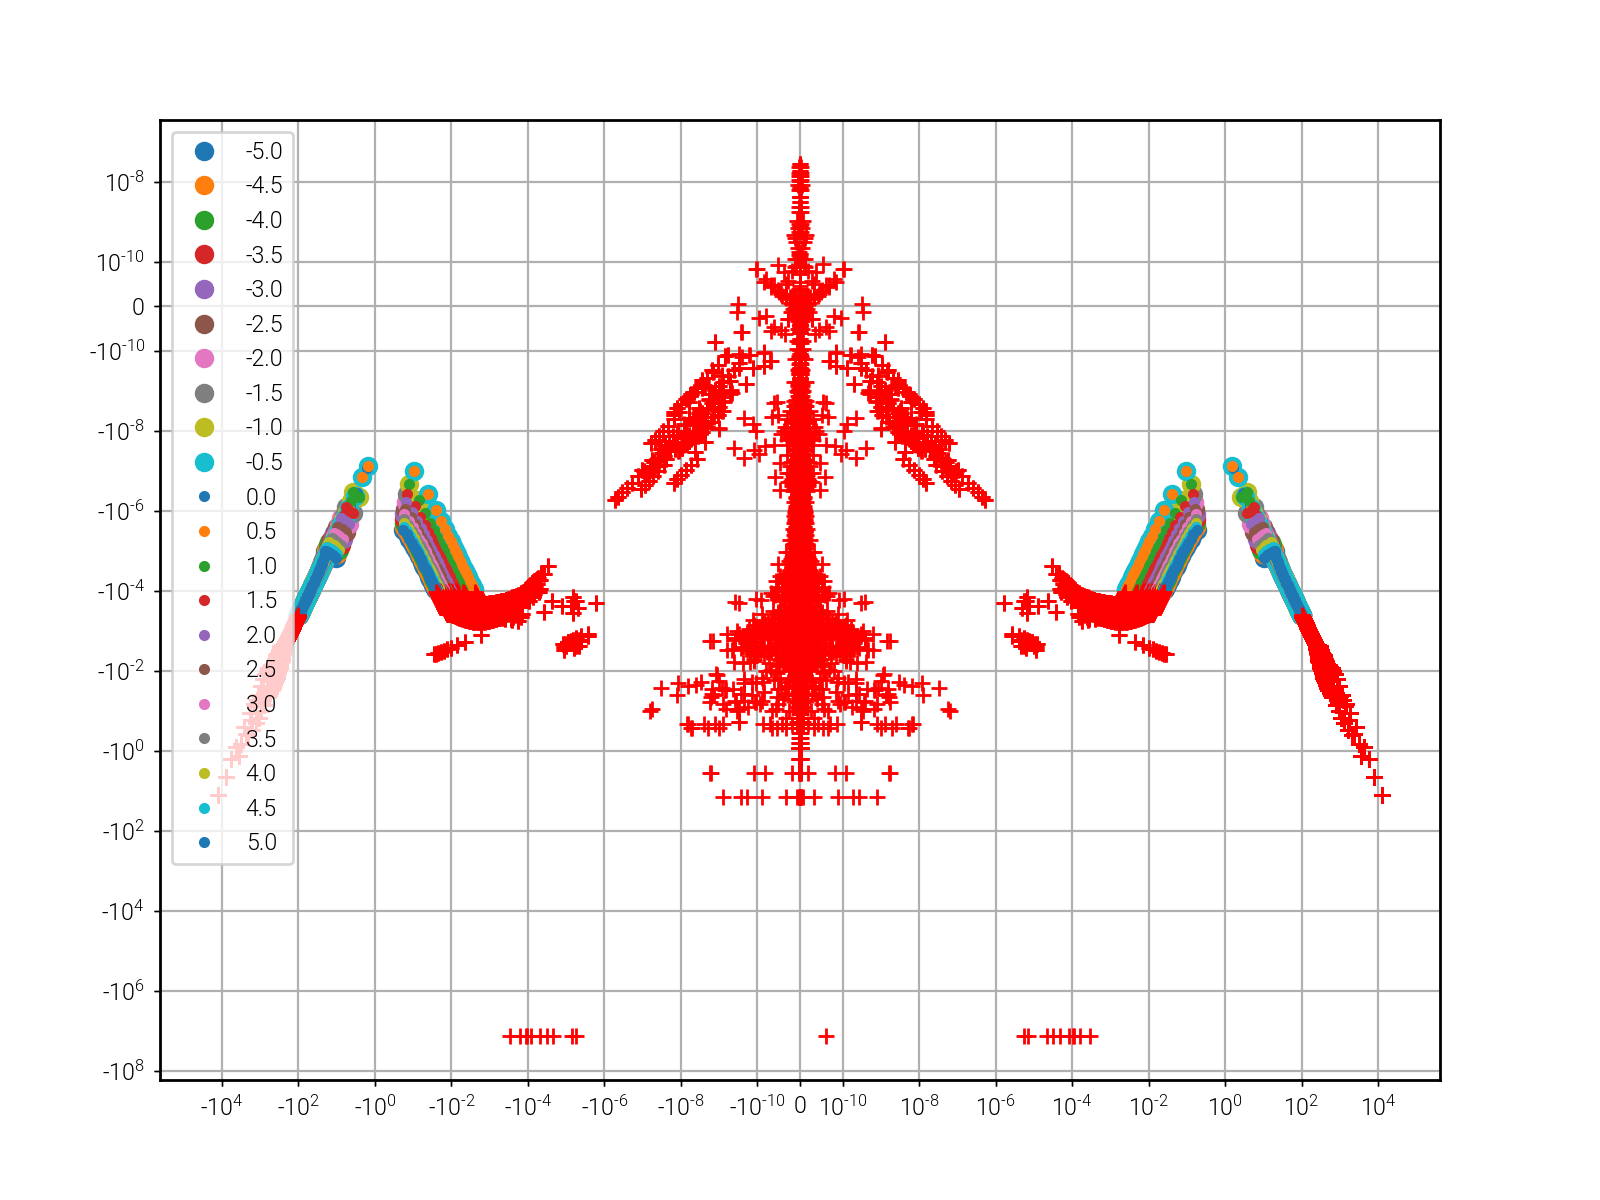

{-5.0: 186,
 -4.5: 186,
 -4.0: 186,
 -3.5: 190,
 -3.0: 190,
 -2.5: 190,
 -2.0: 190,
 -1.5: 190,
 -1.0: 192,
 -0.5: 192,
 0.0: 176,
 0.5: 192,
 1.0: 192,
 1.5: 190,
 2.0: 190,
 2.5: 190,
 3.0: 190,
 3.5: 190,
 4.0: 186,
 4.5: 186,
 5.0: 186}

In [195]:
N = {}
plt.figure()
for krel in krel_list:
    freqs = 1j * shortmodes[krel][0]
    filt = gen_filt(freqs, krel)
    N[krel] = np.sum(filt)
    if krel < 0:
        plt.plot(freqs[filt].real, freqs[filt].imag, 'o', label=str(krel))
        plt.plot(freqs[~filt].real, freqs[~filt].imag, '+r')
    else:
        plt.plot(freqs[filt].real, freqs[filt].imag, '.', label=str(krel))
        plt.plot(freqs[~filt].real, freqs[~filt].imag, '+r')
plt.xscale('symlog', linthreshx=1e-10)
plt.yscale('symlog', linthreshy=1e-10)
plt.grid()
plt.legend(loc='upper left')
N

In [196]:
state_wave = dev.system.FieldSystem(problem.variables, domain)

K_bLc_dict = {}
for krel_c in krel_list:
    print(krel_c)
    # Get c pencil data
    p_c = get_pencil(krel_c)
    evals_c, evecs_c, adj_evals_c, adj_evecs_c, proj_c = shortmodes[krel_c]
    filt_c = gen_filt(1j*evals_c, krel_c)
    N_c = np.sum(filt_c)
    # Compute coupling coefficients
    for j in range(N_c):
        # Set c state
        state_wave.data[:] = 0
        state_wave.set_pencil(p_c, evecs_c[:,filt_c][:,j])
        state_wave.scatter()
        # Compute dF
        compute_dF(solver.state, state_wave)
        for krel_b in krel_list:
            # Shortcut k selection rule
            if (krel_b != krel_c + 1) and (krel_b != krel_c - 1):
                continue
            # Get b pencil data
            p_b = get_pencil(krel_b)
            evals_b, evecs_b, adj_evals_b, adj_evecs_b, proj_b = shortmodes[krel_b]
            filt_b = gen_filt(1j*evals_b, krel_b)
            N_b = np.sum(filt_b)
            # Build coupling coefficient matrix
            if (krel_b, krel_c) not in K_bLc_dict:
                K_bLc = np.zeros((N_b, N_c), dtype=np.complex128)
                K_bLc_dict[(krel_b, krel_c)] = K_bLc
            else:
                K_bLc = K_bLc_dict[(krel_b, krel_c)]
            # Compute coupling coefficients
            #print(dF.get_pencil(p_b))
            K_bLc[:,j] = adj_evecs_b[:,filt_b].conj().T @ dF.get_pencil(p_b)

-5.0
-4.5
-4.0
-3.5
-3.0
-2.5
-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


In [37]:
np.max(np.abs(K_bLc_dict[(3,4)] - K_bLc_dict[(-3,-4)][::-1,::-1].conj()))

0.0

<IPython.core.display.Javascript object>


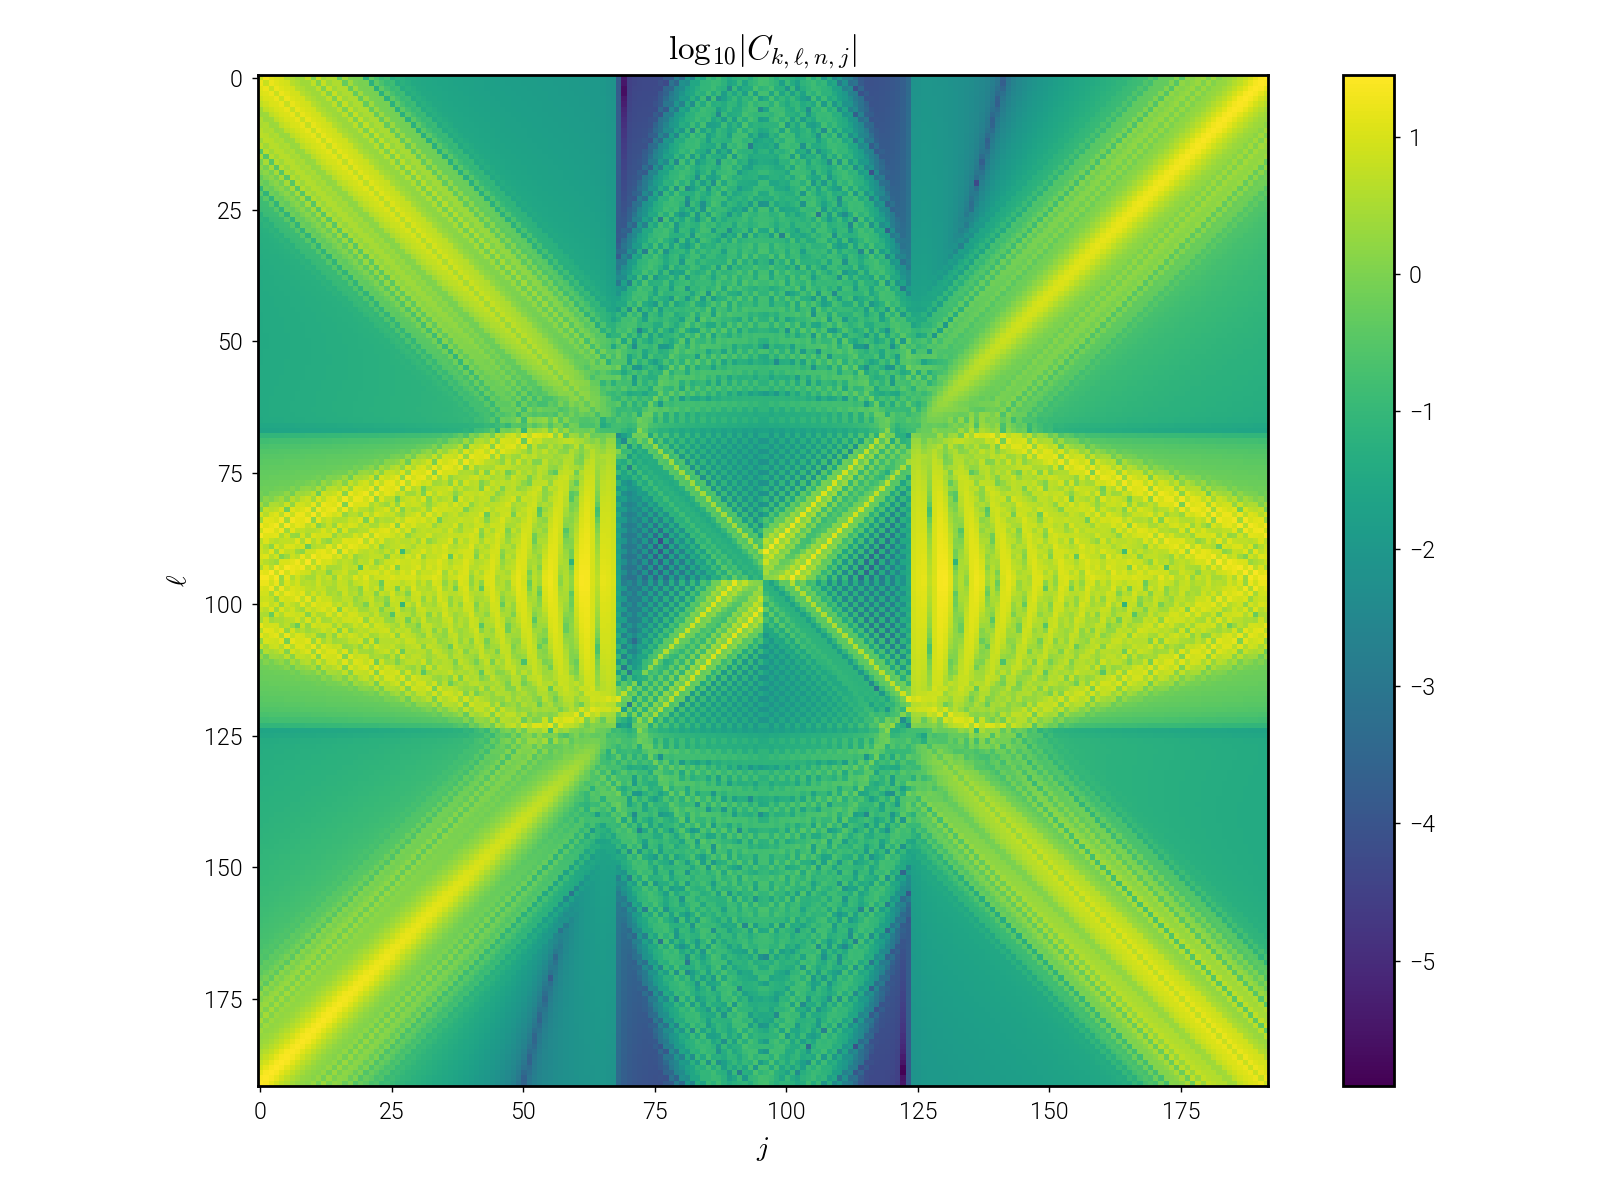

In [197]:
plt.figure()
plt.imshow(np.log10(np.abs(K_bLc_dict[(0.5,-0.5)])), cmap='viridis')
plt.colorbar()
plt.ylabel(r'$\ell$')
plt.xlabel(r'$j$')
plt.title(r'$\log_{10} |C_{k,\ell,n,j}|$')
plt.tight_layout()

In [ ]:
plt.savefig('coupling_single.pdf')

In [198]:
def build_Q(A, krel_list):
    Q = []
    for kb in krel_list:
        Qb = []
        for kc in krel_list:
            if (kb == kc + 1) or (kb == kc - 1):
                Qbc = A * K_bLc_dict[(kb,kc)]
            else:
                Qbc = np.zeros((N[kb], N[kc]), dtype=np.complex128)
            if kb == kc:
                evals = shortmodes[kb][0]
                filt = gen_filt(1j*evals, kb)
                # Shift frequencies into comoving frame where tide is time-independent
                Qbb = np.diag(evals[filt] - (-1j*kb*param.ω_tide))
                Qbc += Qbb
            Qb.append(Qbc)
        Q.append(Qb)
    return np.block(Q)

<IPython.core.display.Javascript object>


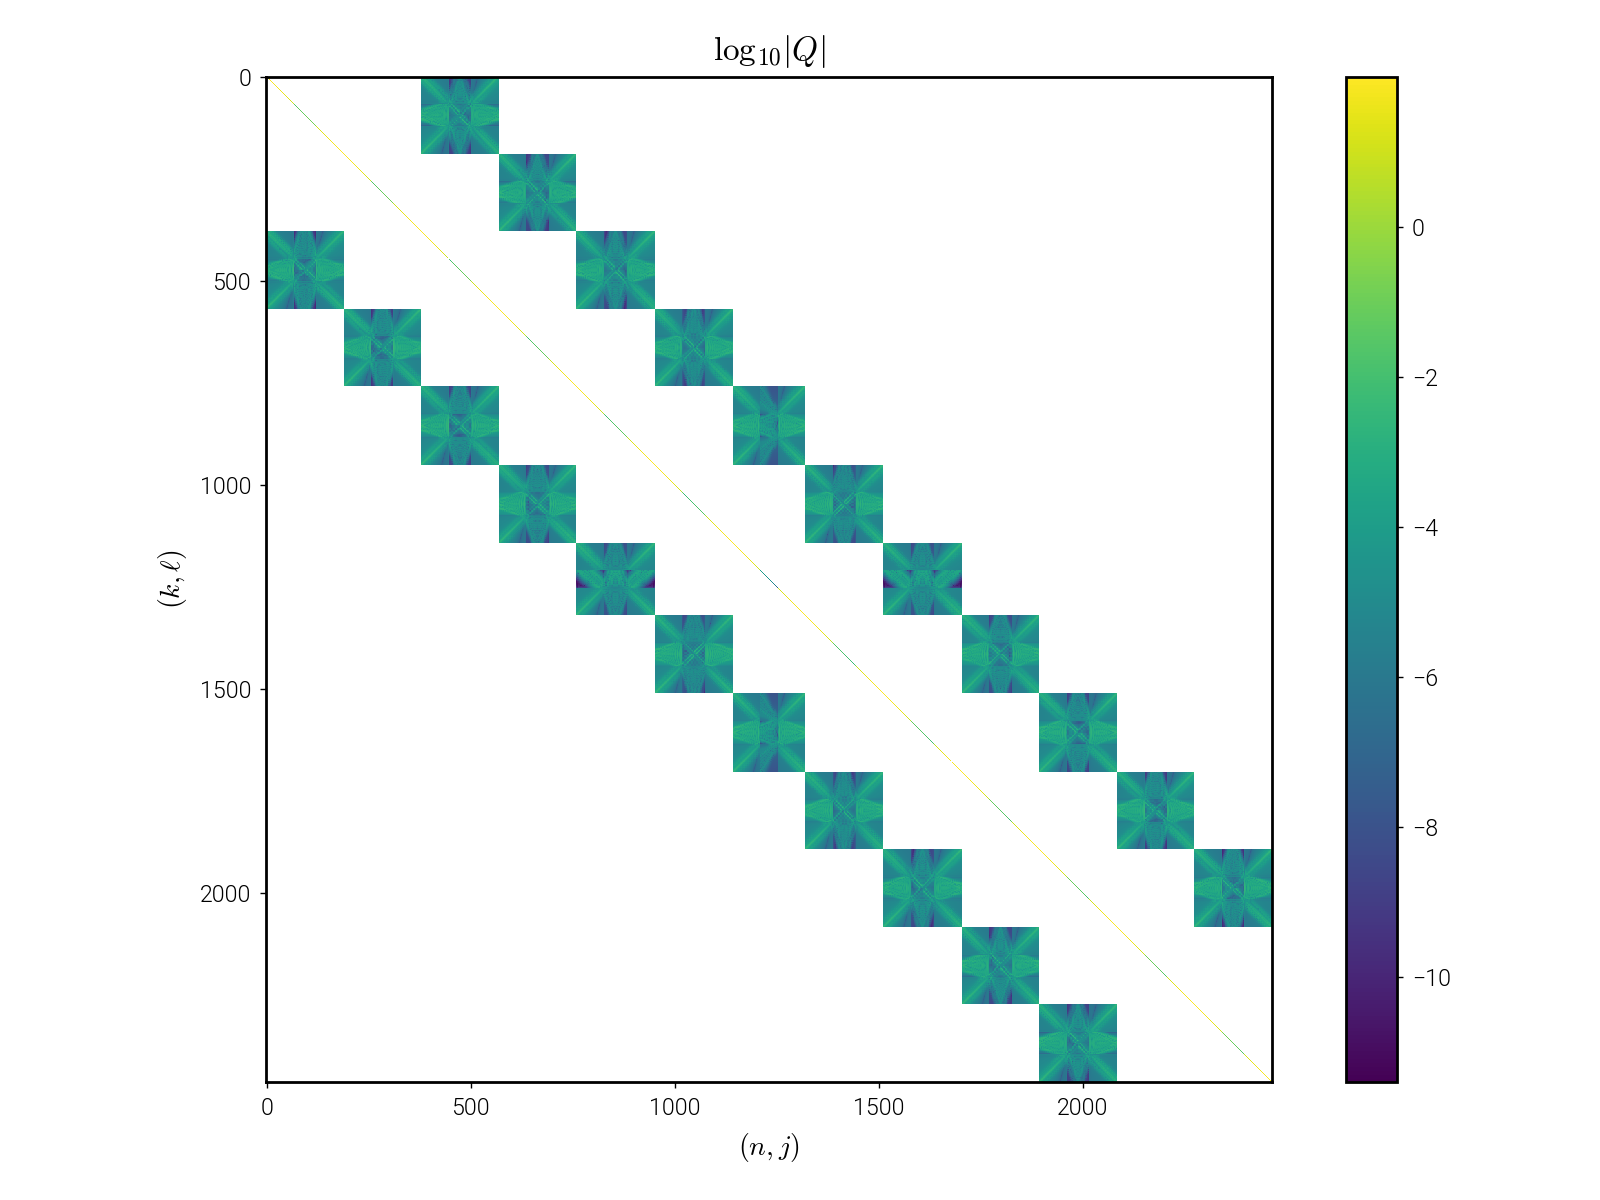

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [199]:
# Build eigenmode-time-evolution matrix Q
A = 1e-4
krel_list = np.arange(-3, 3+0.005, 0.5)
#krel_list = [-2,-1.5,-1,-0.5,0.5,1,1.5,2]
Q = build_Q(A, krel_list)

# Plot Q
plt.figure()
plt.imshow(np.log10(np.abs(Q)), cmap='viridis')
plt.colorbar()
plt.xlabel(r'$(n,j)$')
plt.ylabel(r'$(k,\ell)$')
plt.title(r'$\log_{10} |Q|$')
plt.tight_layout()
plt.savefig('coupling_many.pdf')

In [200]:
# Find eigenmodes of Q
Q_evals, Q_evecs = linalg.eig(Q)
Q_freqs = 1j * Q_evals

<IPython.core.display.Javascript object>


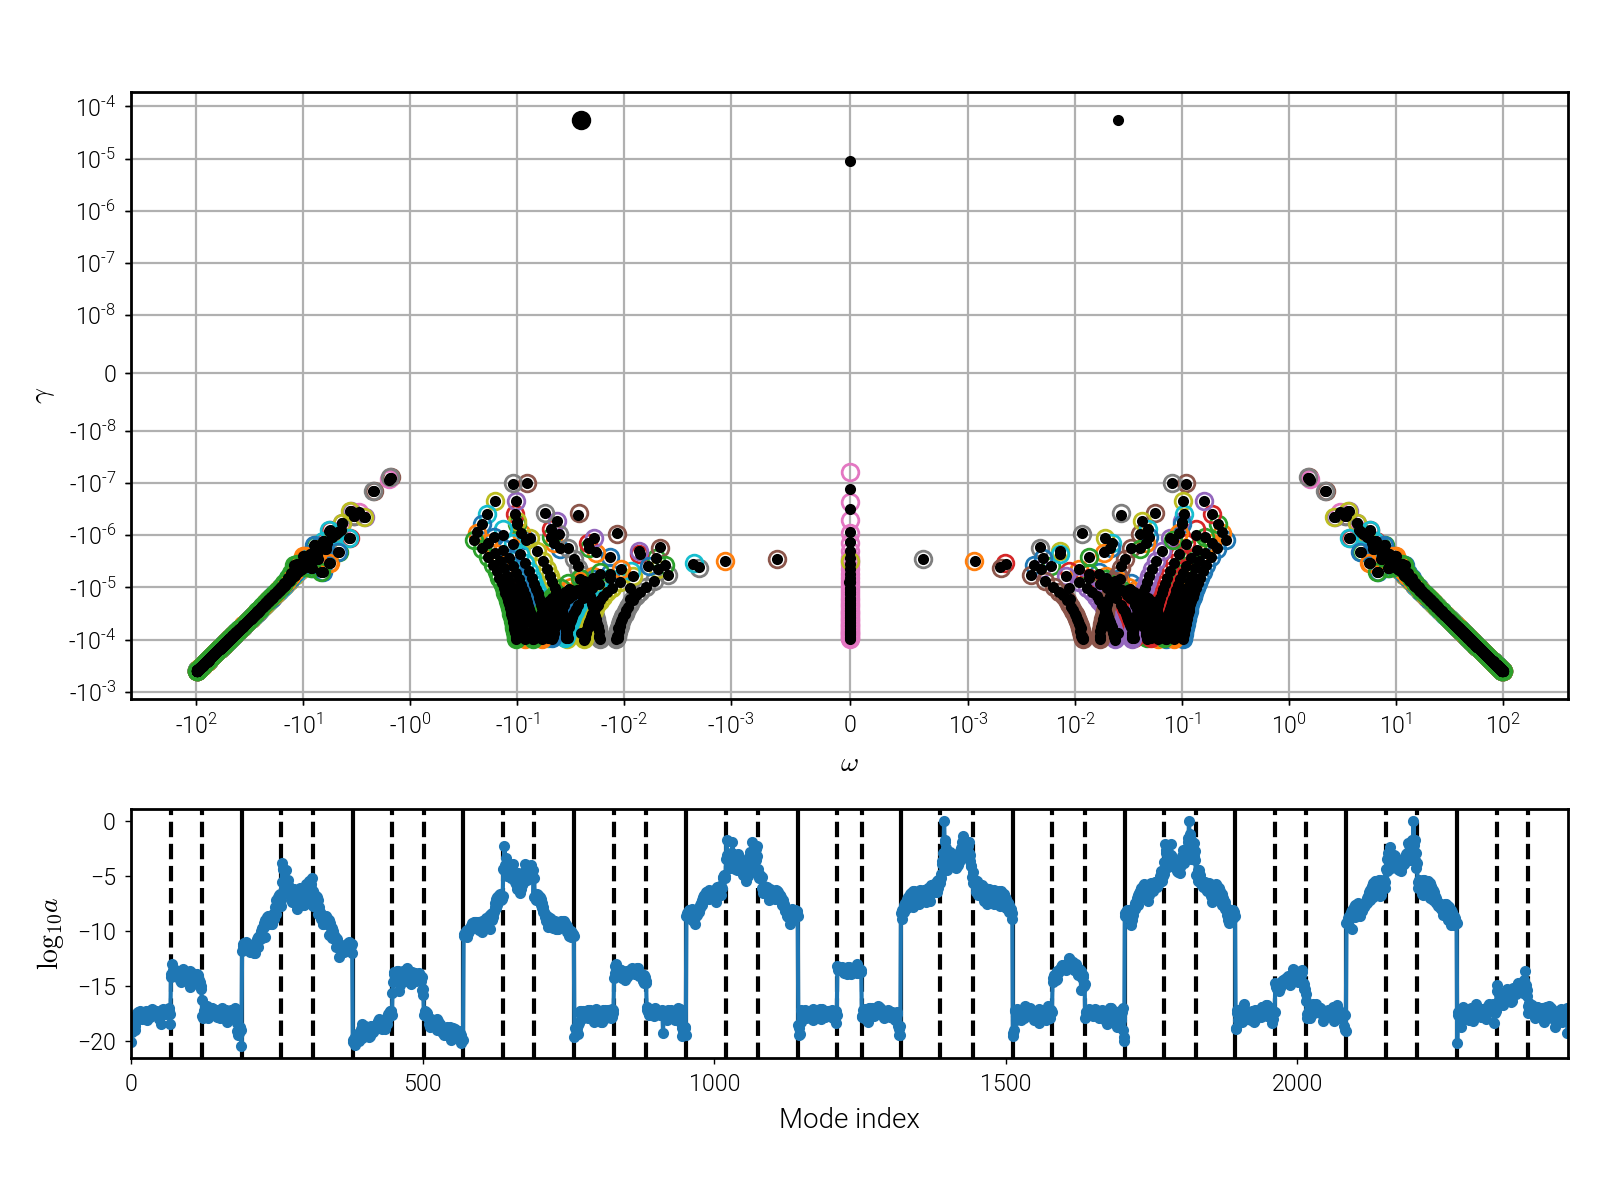

8

In [201]:
item = 1

# Plot eigenvalues of Q
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
for krel in krel_list:
    freqs = 1j * shortmodes[krel][0]
    filt = gen_filt(freqs, krel)
    ax1.plot(freqs[filt].real-krel*param.ω_tide, freqs[filt].imag, 'o', mfc='none')
plt_Q, = ax1.plot(Q_freqs.real, Q_freqs.imag, '.k', picker=2)
ax1.set_xscale('symlog', linthreshx=1e-3)
ax1.set_yscale('symlog', linthreshy=1e-8)
ax1.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$\gamma$')
plt.grid()
active_dot, = ax1.plot(0, 0, 'ok')
active_ev = fig.suptitle('')

# Plot mode separations
ax2 = plt.subplot2grid((3,1), (2,0))
def plot_seps():
    n = 0
    for krel in krel_list:
        # Block separator
        if krel != krel_list[0]:
            ax2.axvline(item*n-0.5, c='k', zorder=-1)
        # P-G separator
        freqs = 1j * shortmodes[krel][0]
        filt = gen_filt(freqs, krel)
        ni = np.sum(freqs[filt].real < -1)
        ax2.axvline(item*n+item*ni-0.5, c='k', ls='dashed', zorder=-1)
        ni = np.sum(freqs[filt].real < 1)
        ax2.axvline(item*n+item*ni-0.5, c='k', ls='dashed', zorder=-1)
        n += N[krel]
    ax2.set_xlim(0, item*n)
    #ax2.set_ylim(-15,0)
    ax2.set_xlabel('Mode index')
    ax2.set_ylabel(r'$\log_{10} a$')

def plot_mode(event):
    # Update active eigenvalue
    Xm, Ym = event.mouseevent.x, event.mouseevent.y
    x = plt_Q.get_xdata()
    y = plt_Q.get_ydata()
    XY = ax1.transData.transform(np.array([x,y]).T)
    dXY = XY - np.array([Xm, Ym])
    D = np.sum(dXY**2, axis=1)
    index = np.argmin(D)
    freq = Q_freqs[index]
    active_dot.set_xdata([x[index]])
    active_dot.set_ydata([y[index]])
    #active_ev.set_text('%i: %s' %(index, freq))
    # Plot mode
    ax2.cla()
    evec = Q_evecs[:,index]
    evec = evec / np.max(np.abs(evec))
    ax2.plot(np.log10(np.abs(evec)), '.-')
    plot_seps()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.canvas.mpl_connect('pick_event', plot_mode)

In [163]:
plt.savefig('unstable_set.pdf')

In [202]:
# Threshold
krel_list = np.arange(-3, 3+0.05, 0.5)
A_list = 10**np.linspace(-6,-3,30)

smax_list = []
for A in A_list:
    print(A)
    Q = build_Q(A, krel_list)
    Q_evals, Q_evecs = linalg.eig(Q)
    smax = np.max(Q_evals.real)
    smax_list.append(smax)
    print(' ', smax)

1e-06
  -6.20189761149677e-08
1.2689610031679234e-06
  -6.202983985526145e-08
1.6102620275609392e-06
  -6.204701388545646e-08
2.0433597178569437e-06
  -6.207387504854772e-08
2.592943797404667e-06
  -6.211505873546796e-08
3.290344562312671e-06
  -6.217602075491011e-08
4.1753189365604e-06
  -6.226033629562913e-08
5.298316906283713e-06
  -6.236029989313437e-08
6.723357536499335e-06
  -6.242867814607078e-08
8.531678524172814e-06
  -6.229813132265954e-08
1.082636733874054e-05
  -6.145082582099611e-08
1.3738237958832637e-05
  -5.8303909594303804e-08
1.7433288221999873e-05
  -4.748363381557476e-08
2.21221629107045e-05
  -5.829065081639317e-09
2.8072162039411757e-05
  1.635059998542987e-07
3.5622478902624444e-05
  6.118950634324465e-07
4.520353656360241e-05
  1.4275087744390684e-06
5.736152510448681e-05
  2.720967431288029e-06
7.278953843983146e-05
  4.682001580867564e-06
9.236708571873866e-05
  7.6148973347708775e-06
0.00011721022975334806
  0.00010630750342741192
0.00014873521072935117
  0.0

<IPython.core.display.Javascript object>


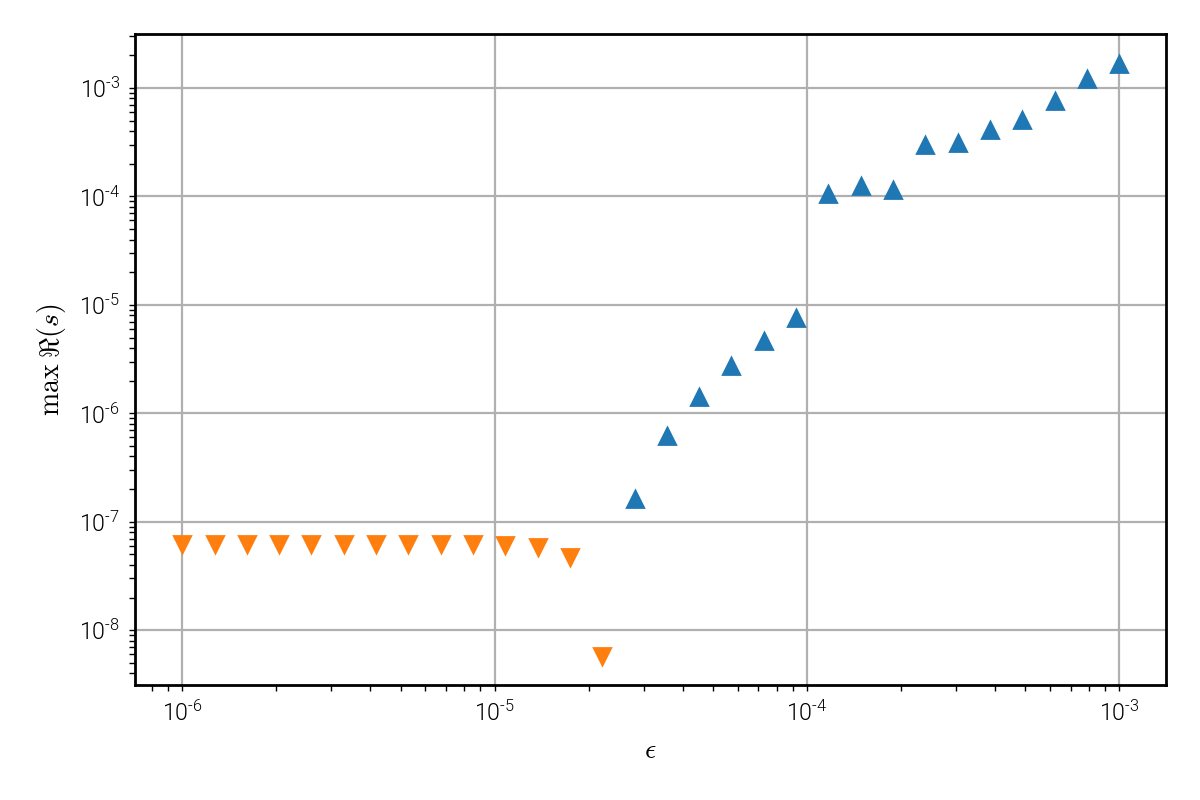

In [203]:
A = np.array(A_list)
smax = np.array(smax_list)

plt.figure(figsize=(6,4))
plt.plot(A[smax > 0], smax[smax > 0], '^')
plt.plot(A[smax < 0], -smax[smax < 0], 'v')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\max \; \Re(s)$')
plt.tight_layout()

In [ ]:
plt.savefig('coupled_growth.pdf')

In [57]:
smax_list

[-6.201897730139741e-08,
 -6.208160169813258e-08,
 -6.230419334541564e-08,
 -6.187423937453786e-08,
 -1.3923920345659548e-08,
 1.5452516828430207e-06,
 8.887346532633077e-06,
 8.060005012276874e-05,
 0.0005101574291328943,
 0.0017330888721325262]

## Self-coupling

In [109]:
krel = 0.5
ω = 6.43e-4

# Find index of positive mode
evals = shortmodes[krel][0]
freqs = 1j * evals
filt = gen_filt(1j*evals, krel)
filt_index_f = np.argmin(np.abs(freqs[filt].real - krel*param.ω_tide - ω))
freq_f = freqs[filt][filt_index_f]
print(freq_f)

# Find index of negative mode
evals = shortmodes[-krel][0]
freqs = 1j * evals
filt = gen_filt(1j*evals, -krel)
filt_index_b = np.argmin(np.abs(-freqs[filt].real - krel*param.ω_tide - ω))
freq_b = freqs[filt][filt_index_b]
print(freq_b)

# Build Q
def build_Q_self(A):
    Q = np.zeros((2,2), dtype=np.complex128)
    Q[0,0] = -1j * (freq_f - krel*param.ω_tide)
    Q[1,1] = -1j * (freq_b + krel*param.ω_tide)
    Q[0,1] = A * K_bLc_dict[(krel, -krel)][filt_index_f, filt_index_b]
    Q[1,0] = A * K_bLc_dict[(-krel, krel)][filt_index_b, filt_index_f]
    return Q

(0.014989827808875382-2.8359509540108117e-06j)
(-0.014989827808875382-2.8359509540108117e-06j)


In [122]:
A_range = np.linspace(8e-3, 9e-3, 100000)
growth = []
for A in A_range:
    Q = build_Q_self(A)
    freq = 1j * np.linalg.eigvals(Q)
    growth.append(np.max(freq.imag))

<IPython.core.display.Javascript object>


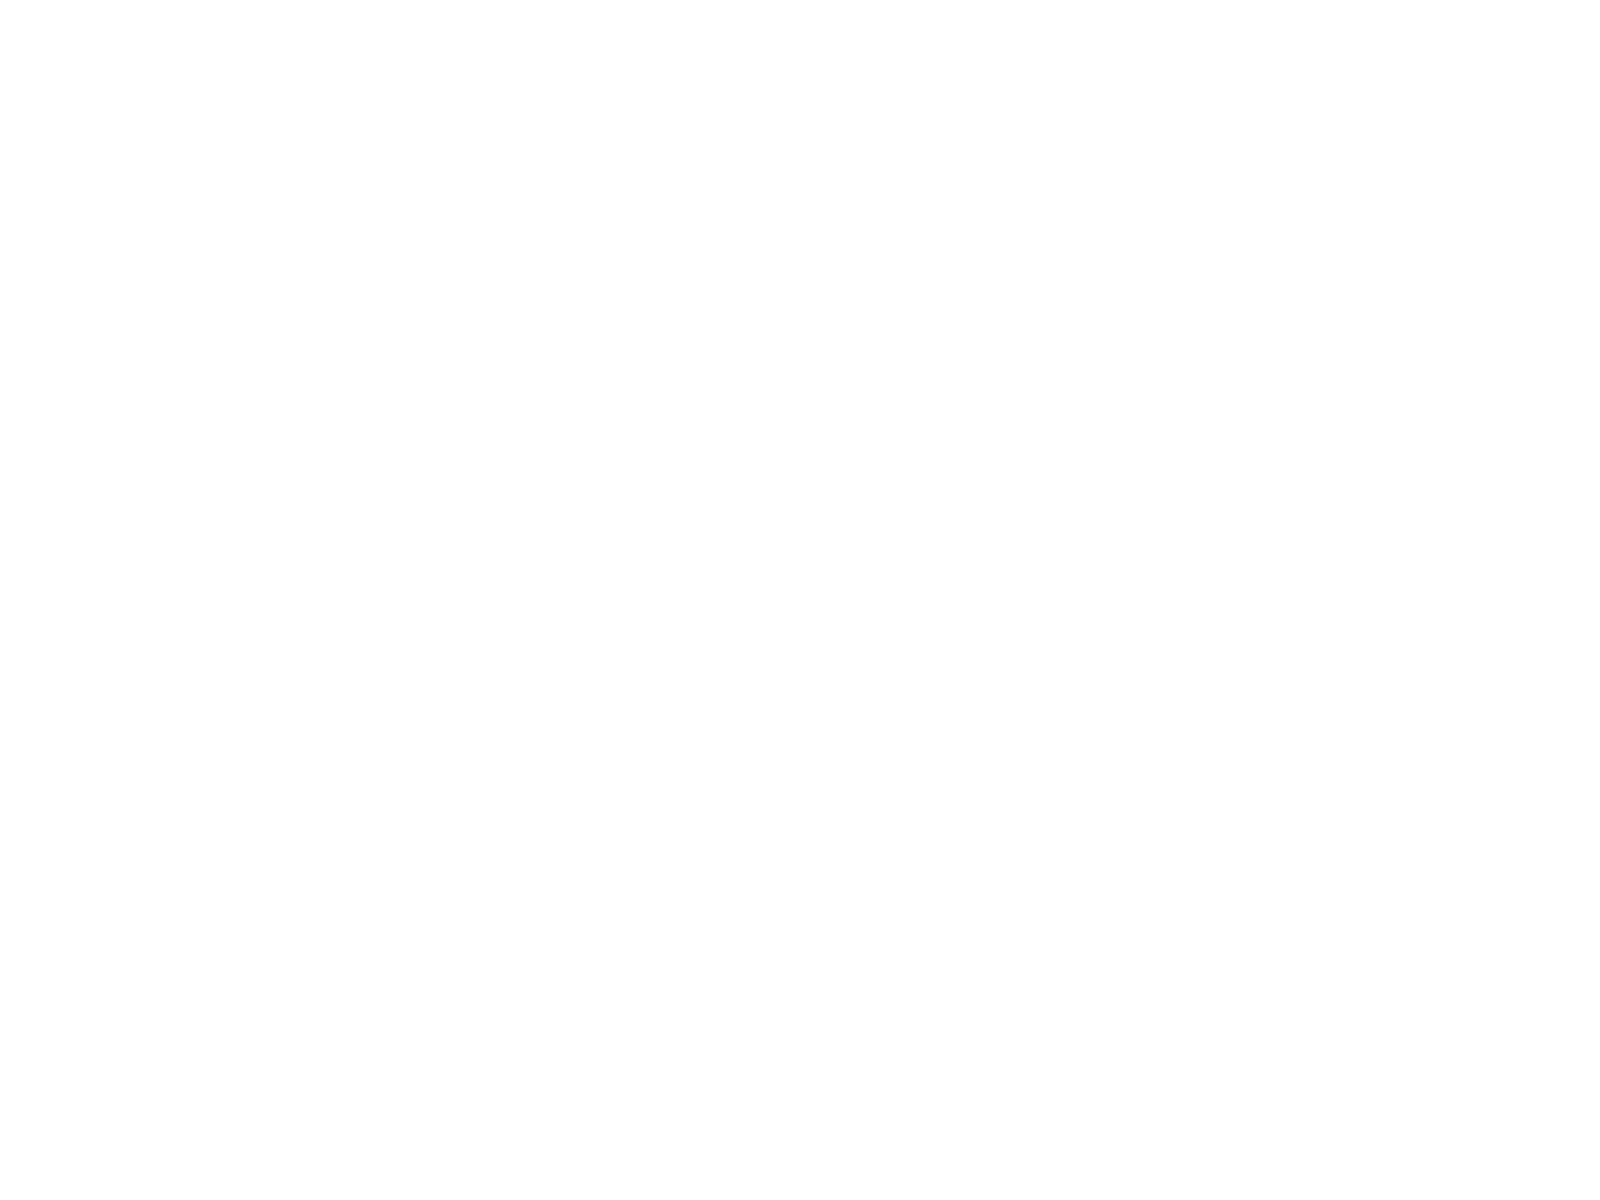

<IPython.core.display.Javascript object>


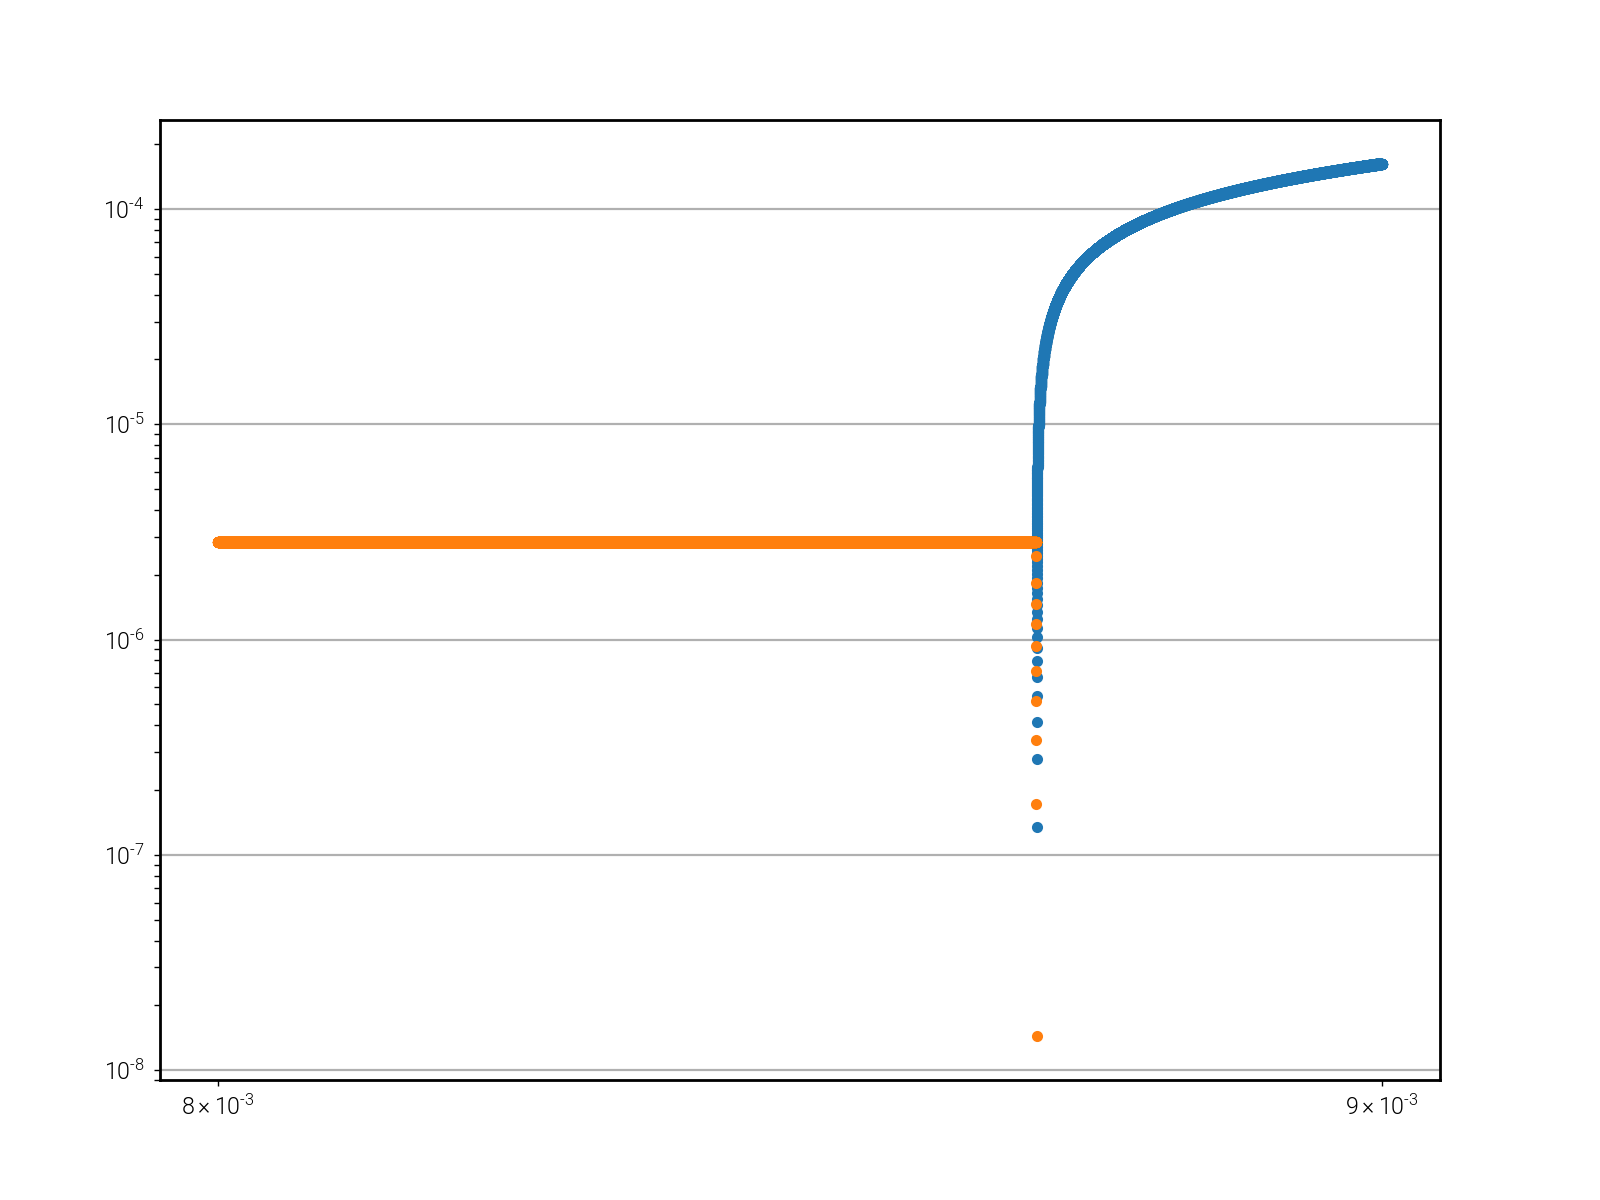

In [123]:
A = A_range
smax = np.array(growth)

plt.figure()
plt.figure()
plt.plot(A[smax > 0], smax[smax > 0], '.')
plt.plot(A[smax < 0], -smax[smax < 0], '.')
plt.xscale('log')
plt.yscale('log')
plt.grid()
#plt.plot(A_range, growth, '.-k')
#plt.xlabel('Amplitude')
#plt.ylabel('Growth rate')

<IPython.core.display.Javascript object>


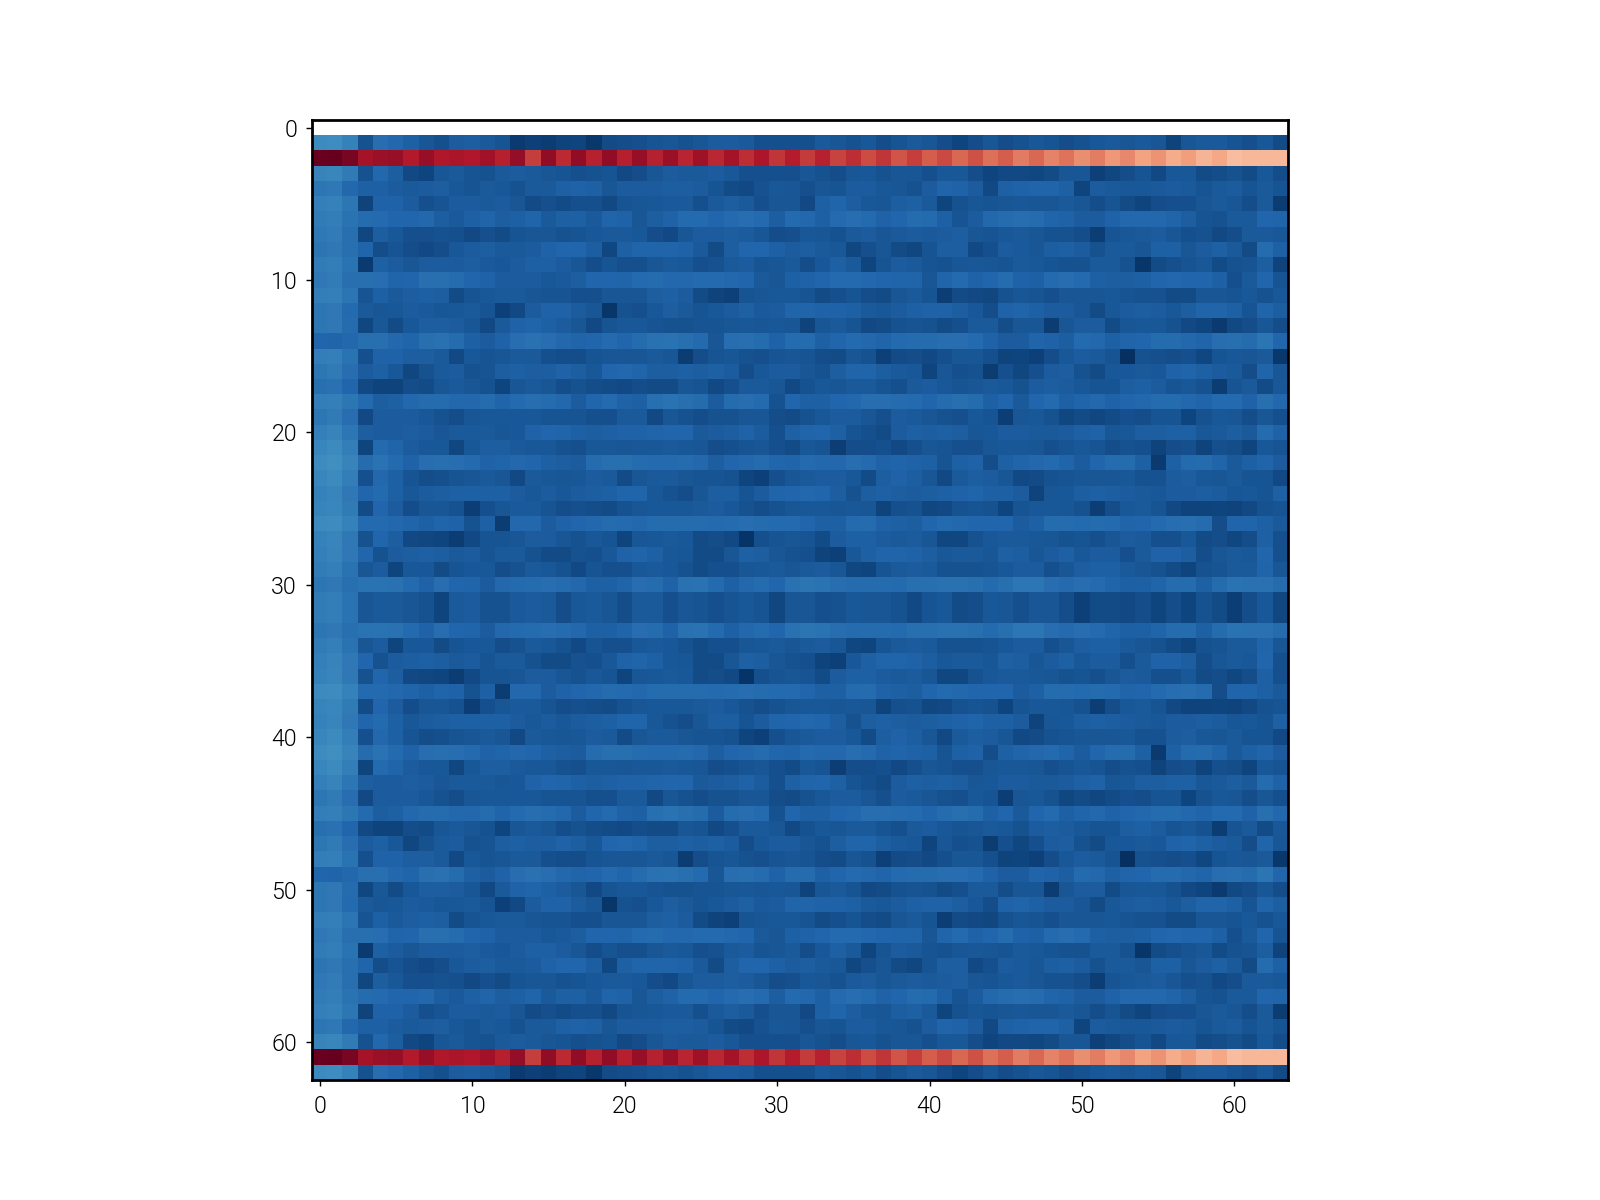

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [28]:
plt.figure()
plt.imshow(np.log10(np.abs(solver.state['p1']['c'])))

In [323]:
krel_b, krel_c

(1, 1)

In [27]:
solver_bvp.state.data

array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-2.74875079e-16+5.21320386e-17j,  2.11737227e-18-3.98806048e-19j,
         1.09655938e-19-1.68711202e-20j, ...,
        -1.08891258e-22+2.27834387e-21j,  1.35011105e-17-1.02794735e-17j,
         1.47161148e-19-1.93077882e-19j],
       [ 2.32132675e+00-3.82630916e-03j, -1.78554579e-02-1.41137860e-04j,
        -5.23319326e-05+1.09372640e-01j, ...,
         5.52590401e-08-6.91316875e-09j, -6.51814102e-05-2.47870458e-04j,
        -2.32238623e-06+6.07882518e-08j],
       ...,
       [ 1.30509792e-16+4.89215079e-17j, -1.00442476e-18-3.76563260e-19j,
        -7.93123517e-20-2.76397516e-21j, ...,
         6.37252307e-20+2.06693107e-20j, -1.32547889e-16+1.20990249e-16j,
        -8.25641513e-18-1.86154692e-18j],
       [ 2.32132675e+00+3.82630916e-03j, -1.